In [1]:
import scipy as scipy
import pandas as pd
import matplotlib.pyplot as plt
import h5py
import seaborn as sns

# Important comments/resume
YOU SHOULD PUT IN THE FOLDER THE RIGHT DAVOS AND LAEGEREN FILES BECAUSE IT IS TOO HEAVY TO PUSH

We should maybe select a higher treshold for VPD because its relationship with GPP is not clear

Also wondering if we should use an other indicator than GPP (NPP, SIF...)

We however see that SM is more discriminant than VPD, but might be due to the things discussed above.

Chamau: 4-9

cha_sgeren : lae_daily['Month'].isin([4,5,6,7]))] better than 4-9

Davos : 

# Load data

In [2]:
cha_mat= h5py.File("CHAMAU.mat", 'r')
cha_mat

<HDF5 file "CHAMAU.mat" (mode r)>

In [ ]:
print(list(cha_mat.keys()))

['#refs#', 'ALB', 'ANPP_H', 'ANPP_L', 'AgeDL_H', 'AgeDL_L', 'AgeL_H', 'AgeL_L', 'AgePl_H', 'AgePl_L', 'AgrHarNut', 'Aice', 'An_H', 'An_L', 'Ared', 'Asur', 'Axyl_H', 'Axyl_L', 'BA_H', 'BA_L', 'BLit', 'B_H', 'B_L', 'Bfac_dayH', 'Bfac_dayL', 'Bfac_lo_H', 'Bfac_lo_L', 'Bfac_ls_H', 'Bfac_ls_L', 'Bfac_weekH', 'Bfac_weekL', 'Bio_Zs', 'CASE_ROOT', 'CK1', 'CK2', 'CO2', 'CT_H', 'CT_L', 'Ca', 'Cbare', 'Ccrown', 'CcrownFIX', 'Ccrown_t', 'Ci_shdH', 'Ci_shdL', 'Ci_sunH', 'Ci_sunL', 'Cice', 'Cicew', 'Ck', 'CkC_ALL', 'CkC_H', 'CkC_L', 'CkK_H', 'CkK_L', 'CkN_H', 'CkN_L', 'CkP_H', 'CkP_L', 'Cl_H', 'Cl_L', 'Color_Class', 'Computational_Time', 'Crock', 'Csno', 'Csnow', 'Curb', 'Cwat', 'Cx_H', 'Cx_L', 'DQ', 'DSE_H', 'DSE_L', 'DT', 'Datam', 'Date', 'Deb_Par', 'DeltaGMT', 'Directory', 'Do_H', 'Do_L', 'Dr_H', 'Dr_L', 'Ds', 'Dz', 'EG', 'EICE', 'EIn_H', 'EIn_L', 'EIn_rock', 'EIn_urb', 'EK', 'ELitter', 'ESN', 'ESN_In', 'ET', 'ETen', 'EWAT', 'EvL_Zs', 'ExEM', 'FI_H', 'FI_L', 'FNC_H', 'FNC_L', 'FROCK', 'G', 'Gfin'

In [3]:
cha = pd.DataFrame(
    { 
        #'NPP': cha_mat['NPP_L'][:].squeeze(), #Net primary production for low vegetation calculated each day with the T&C model
        'Ta': cha_mat['Ta'][:].squeeze(),
        'VPD': cha_mat['Ds'][:].squeeze(), #in Pa
        'SM': cha_mat['OL'][:].squeeze(), # OF first soil layer (surface) #OL=low veget #OH=high veget
        'PARB': cha_mat['PARB'][:].squeeze(), #direct radiation
        'PARD': cha_mat['PARD'][:].squeeze(), #diffuse radiation
        #'SIF':cha_mat['SIF_L'][:].squeeze() #CHA=grassland--> low vegetation # valeurs chaque jour donc on ajoute après
    }
)
cha['PAR']= cha['PARB'] + cha['PARD']
cha

,Ta,VPD,SM,PARB,PARD,PAR
0,2.2570,6.134699,0.000000,0.0,0.0,0.0
1,2.2945,6.069162,0.432367,0.0,0.0,0.0
2,2.2490,13.289646,0.431340,0.0,0.0,0.0
3,2.3290,17.970873,0.430682,0.0,0.0,0.0
4,2.7175,15.666741,0.430300,0.0,0.0,0.0
...,...,...,...,...,...,...
140251,1.1260,0.074910,0.354814,0.0,0.0,0.0
140252,0.8890,0.000000,0.355337,0.0,0.0,0.0
140253,0.1375,0.000000,0.355185,0.0,0.0,0.0
140254,-0.6775,0.000000,0.354846,0.0,0.0,0.0


In [4]:
start_date = '2005-01-01 00:00:00' #pour trouver la date de début: matlab/inputs/timestamp
#2005 à 2023, toutes les 30 min dans le excel: 333 073 valeurs
# dans les résultats: 87  648 valeurs --> toutes les heures et pour une période 2 fois moins longue: 2005 à 2014
date_range = pd.date_range(start=start_date, periods=len(cha), freq='H')
cha['Date'] = date_range
cha['Date_day'] = cha['Date'].dt.date
cha['Year'] = cha['Date'].dt.year
cha['Month'] = cha['Date'].dt.month
cha['Day'] = cha['Date'].dt.day
cha['Hour'] = cha['Date'].dt.hour

#les data ne vont que jusqu'à 2016 dans CHAMAU alors qu'elles vont jusqu'à 2023 dans les données de base
cha


C:\Users\moeag\AppData\Local\Temp\ipykernel_11276\2867860223.py:4: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  date_range = pd.date_range(start=start_date, periods=len(cha), freq='H')


,Ta,VPD,SM,PARB,PARD,PAR,Date,Date_day,Year,Month,Day,Hour
0,2.2570,6.134699,0.000000,0.0,0.0,0.0,2005-01-01 00:00:00,2005-01-01,2005,1,1,0
1,2.2945,6.069162,0.432367,0.0,0.0,0.0,2005-01-01 01:00:00,2005-01-01,2005,1,1,1
2,2.2490,13.289646,0.431340,0.0,0.0,0.0,2005-01-01 02:00:00,2005-01-01,2005,1,1,2
3,2.3290,17.970873,0.430682,0.0,0.0,0.0,2005-01-01 03:00:00,2005-01-01,2005,1,1,3
4,2.7175,15.666741,0.430300,0.0,0.0,0.0,2005-01-01 04:00:00,2005-01-01,2005,1,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...
140251,1.1260,0.074910,0.354814,0.0,0.0,0.0,2020-12-31 19:00:00,2020-12-31,2020,12,31,19
140252,0.8890,0.000000,0.355337,0.0,0.0,0.0,2020-12-31 20:00:00,2020-12-31,2020,12,31,20
140253,0.1375,0.000000,0.355185,0.0,0.0,0.0,2020-12-31 21:00:00,2020-12-31,2020,12,31,21
140254,-0.6775,0.000000,0.354846,0.0,0.0,0.0,2020-12-31 22:00:00,2020-12-31,2020,12,31,22


(1, 5845)
(1, 140256)


<Axes: >

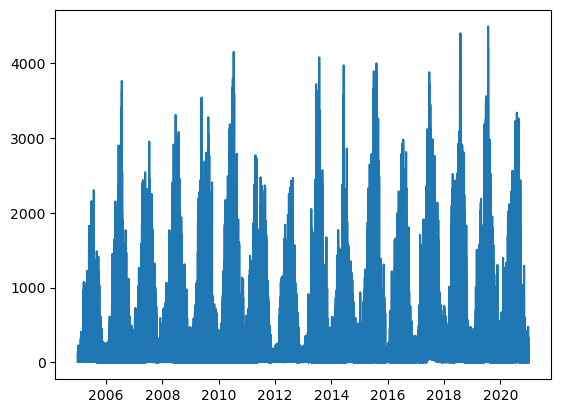

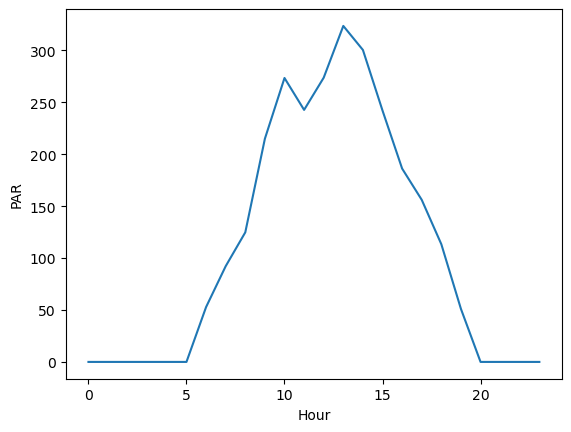

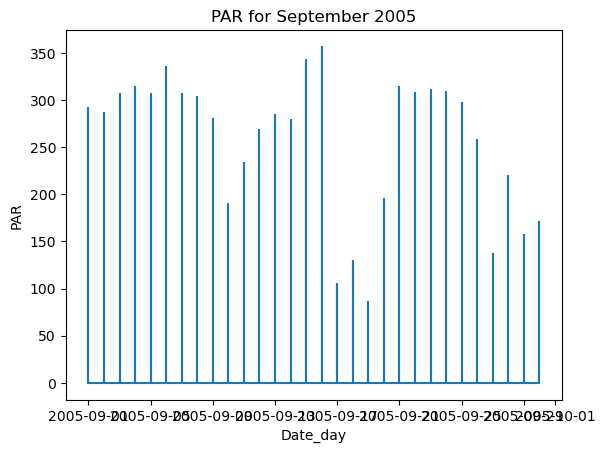

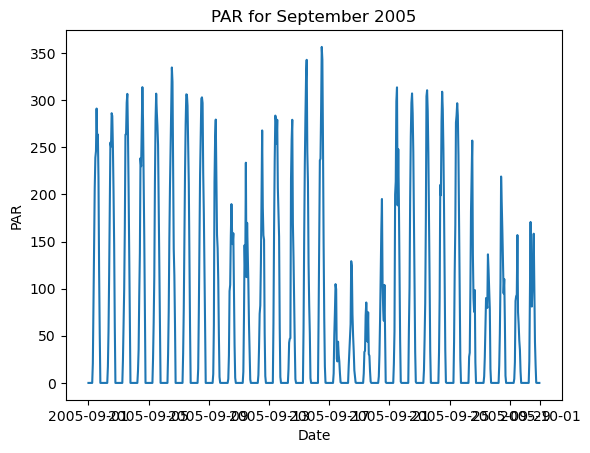

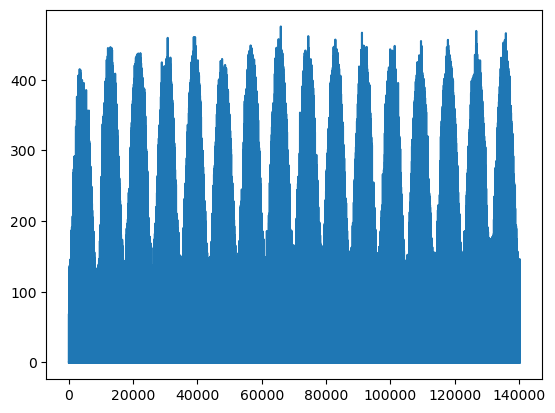

In [19]:
plt.figure()
plt.plot(cha['Date'], cha['VPD'])

cha_day = cha[(cha['Year'] == 2005) & (cha['Month'] == 7)& (cha['Day'] == 20)]
cha_sept = cha[(cha['Year'] == 2005) & (cha['Month'] == 9)]

# Graphe GPP vs Date pour juin 2005
plt.figure()
plt.plot(cha_day['Hour'], cha_day['PAR'])
plt.ylabel('PAR')
plt.xlabel('Hour')

plt.figure()
plt.plot(cha_sept['Date_day'], cha_sept['PAR'])
plt.ylabel('PAR')
plt.xlabel('Date_day')
plt.title('PAR for September 2005')

plt.figure()
plt.plot(cha_sept['Date'], cha_sept['PAR'])
plt.ylabel('PAR')
plt.xlabel('Date')
plt.title('PAR for September 2005')

print(cha_mat['NPP_L'][:].shape)
print(cha_mat['OL'][:].shape)
plt.figure()
cha['PAR'].plot()

On ne prendra que les data de 8h à 16h

# Daily mean

<Axes: >

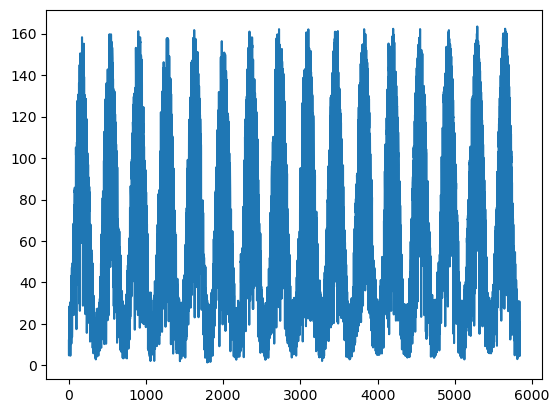

In [36]:
# Groupby day to have daily mean
cha_daily = cha.groupby('Date_day')[['Ta','VPD','SM', 'PAR']].mean().reset_index()

#rearrange
cha_daily.rename(columns={'Date_day': 'Date'}, inplace=True)
cha_daily['Date'] = pd.to_datetime(cha_daily['Date'])
cha_daily['Year'] = cha_daily['Date'].dt.year
cha_daily['Month'] = cha_daily['Date'].dt.month
cha_daily['Day'] = cha_daily['Date'].dt.day

plt.figure()
cha_daily['PAR'].plot()

In [38]:
# Chamau is grassland so we will use net primary production low vegetation
# 'Ta': cha_mat['Ta'][:].squeeze(),
cha_mat['NPP_L'][0][1:]
cha_daily['NPP'] = cha_mat['NPP_L'][0][1:].squeeze()
cha_daily['SIF'] = cha_mat['Slf_L'][0][1:].squeeze()

#Problème: NPP a une longueur de 3652 alors que daily mean en a un de 3653. La première valeur est de 0 donc on l'enlève

Text(0, 0.5, 'NPP')

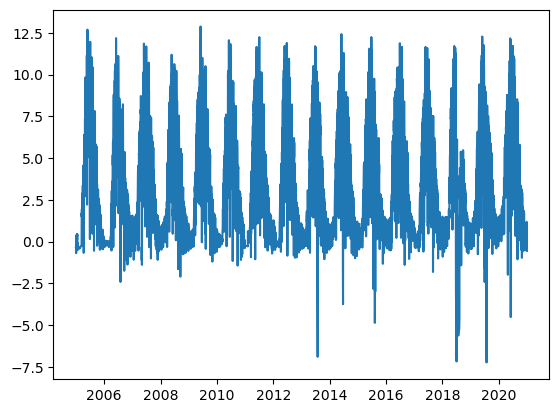

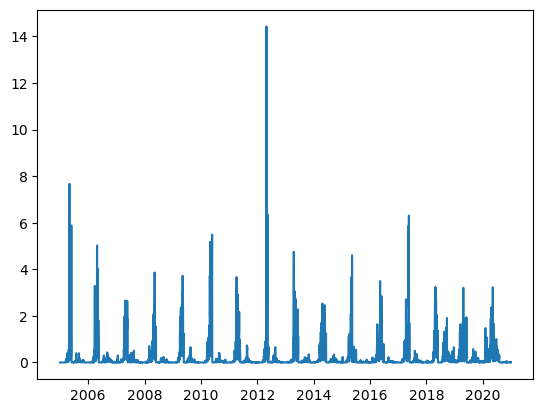

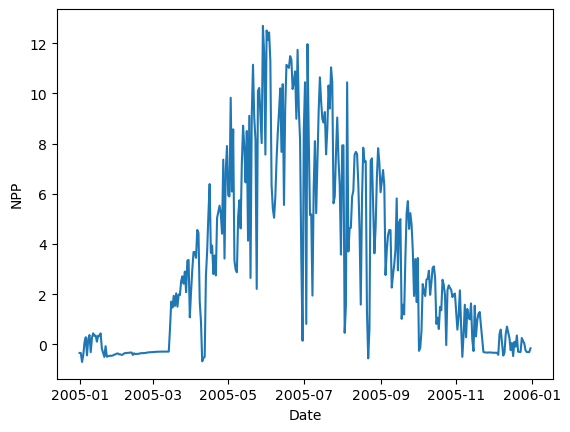

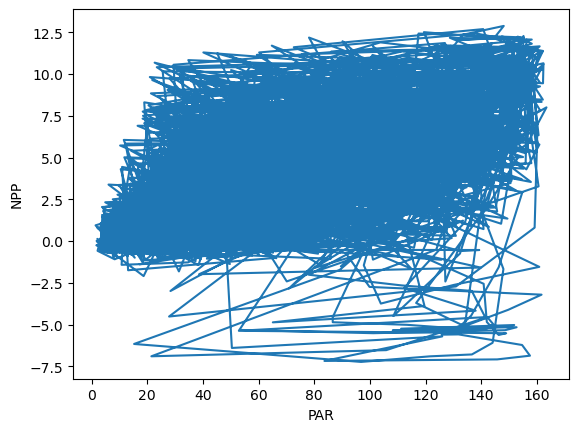

In [39]:
plt.plot(cha_daily['Date'], cha_daily['NPP'])
plt.figure()
plt.plot(cha_daily['Date'], cha_daily['SIF'])
plt.figure()
cha_daily_year=cha_daily[(cha_daily['Year'] == 2005)]
cha_daily_year

plt.plot(cha_daily_year['Date'], cha_daily_year['NPP'])
plt.xlabel('Date')
plt.ylabel('NPP')

plt.figure()
plt.plot(cha_daily['PAR'], cha_daily['NPP'])
plt.xlabel('PAR')
plt.ylabel('NPP')

# Filter data

In [29]:
#Filter the daily data
cha_filtered=cha_daily[(cha_daily['VPD']>500) & (cha_daily['Ta']>15) & (cha_daily['PAR']>100) &(cha_daily['Month'].isin([5, 6, 7,8, 9, 10]))]
cha_filtered

,Date,Ta,VPD,SM,PAR,Year,Month,Day,NPP,SIF
144,2005-05-25,16.486125,541.790846,0.394809,139.774863,2005,5,25,10.096085,0.660965
145,2005-05-26,19.077437,654.859749,0.376440,148.673829,2005,5,26,10.220479,2.707251
146,2005-05-27,21.047333,690.378347,0.364712,143.816213,2005,5,27,9.122543,5.033160
147,2005-05-28,21.948625,772.772026,0.354944,150.480336,2005,5,28,8.021781,5.880713
148,2005-05-29,21.980708,723.018001,0.351671,140.704514,2005,5,29,12.690010,2.893773
...,...,...,...,...,...,...,...,...,...,...
5714,2020-08-24,17.310792,548.583997,0.307443,106.273053,2020,8,24,5.978316,0.000928
5715,2020-08-25,17.284729,563.688065,0.294873,110.632452,2020,8,25,8.356164,0.000562
5716,2020-08-26,21.291042,1149.687780,0.279052,113.417431,2020,8,26,8.527773,0.000740
5717,2020-08-27,17.226979,555.350322,0.264019,108.234503,2020,8,27,6.305859,0.003065


There are 556 observations/days between 2005 and 2014 respecting our three conditions.

# Divide VPD and SM in bins

Text(0.5, 1.0, 'VPD')

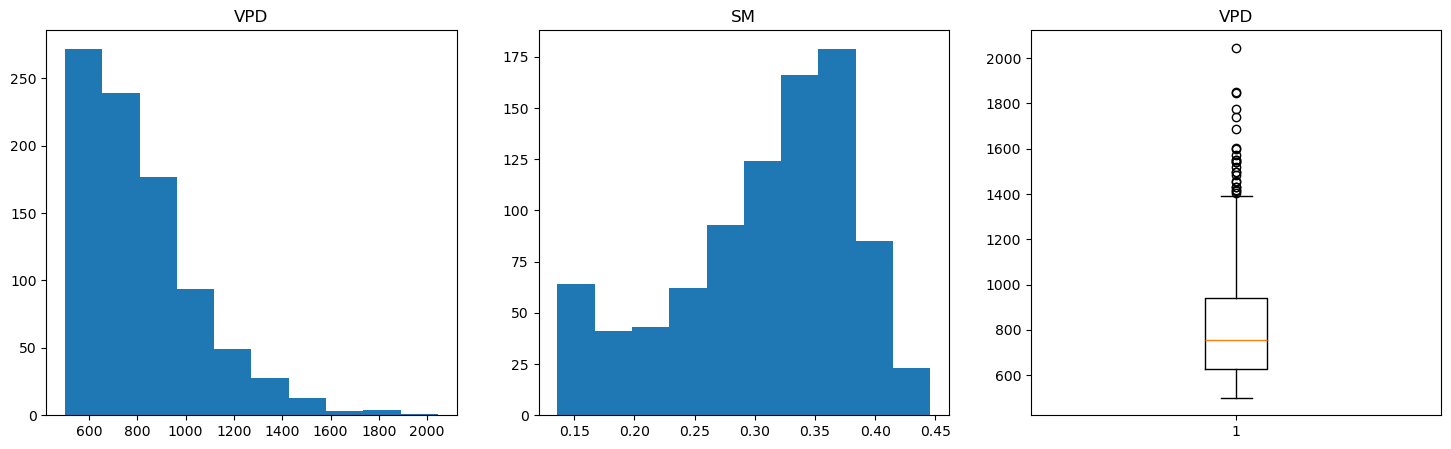

In [30]:
# Histogrammes
plt.figure(figsize=(18, 5))
plt.subplot(1, 3, 1)
plt.hist(cha_filtered['VPD'])
plt.title('VPD')
plt.subplot(1, 3, 2)
plt.hist(cha_filtered['SM'])
plt.title('SM')
plt.subplot(1, 3, 3)
plt.boxplot(cha_filtered['VPD'])
plt.title('VPD')

In [31]:
#Divide in bins
cha_filtered = cha_filtered.copy() #to have an explicit copy (if not it raises an error)
cha_filtered['SM_bin'] = pd.qcut(cha_filtered['SM'], q=5, labels=False) + 1  # labels from 1 to 10 # Quantile-based discretization function.
cha_filtered['VPD_bin'] = pd.qcut(cha_filtered['VPD'], q=5, labels=False) + 1
cha_filtered

,Date,Ta,VPD,SM,PAR,Year,Month,Day,NPP,SIF,SM_bin,VPD_bin
144,2005-05-25,16.486125,541.790846,0.394809,139.774863,2005,5,25,10.096085,0.660965,5,1
145,2005-05-26,19.077437,654.859749,0.376440,148.673829,2005,5,26,10.220479,2.707251,5,2
146,2005-05-27,21.047333,690.378347,0.364712,143.816213,2005,5,27,9.122543,5.033160,4,2
147,2005-05-28,21.948625,772.772026,0.354944,150.480336,2005,5,28,8.021781,5.880713,4,3
148,2005-05-29,21.980708,723.018001,0.351671,140.704514,2005,5,29,12.690010,2.893773,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...
5714,2020-08-24,17.310792,548.583997,0.307443,106.273053,2020,8,24,5.978316,0.000928,3,1
5715,2020-08-25,17.284729,563.688065,0.294873,110.632452,2020,8,25,8.356164,0.000562,2,1
5716,2020-08-26,21.291042,1149.687780,0.279052,113.417431,2020,8,26,8.527773,0.000740,2,5
5717,2020-08-27,17.226979,555.350322,0.264019,108.234503,2020,8,27,6.305859,0.003065,2,1


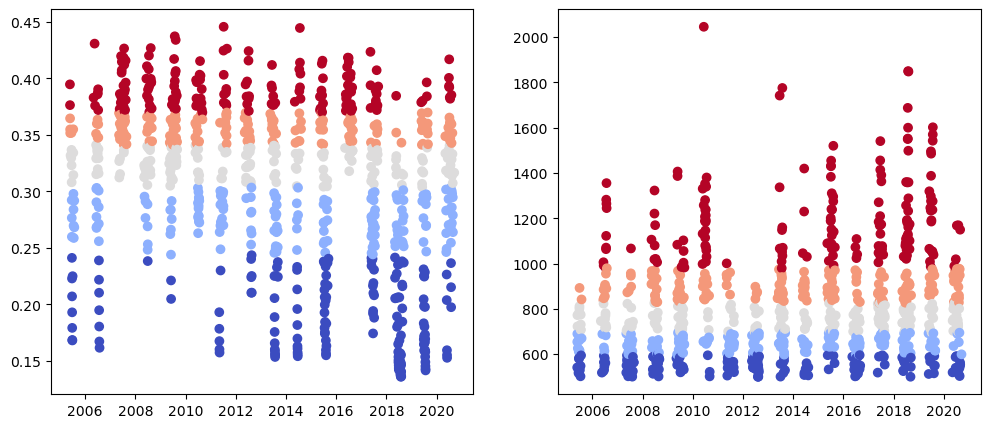

In [32]:
# verification
plt.figure(figsize=(12, 5))
plt.subplot(1,2,1)
plt.scatter(
    cha_filtered['Date'],         
    cha_filtered['SM'],c=cha_filtered['SM_bin'], cmap='coolwarm')
plt.subplot(1,2,2)

plt.scatter(
    cha_filtered['Date'],         
    cha_filtered['VPD'],c=cha_filtered['VPD_bin'], cmap='coolwarm')

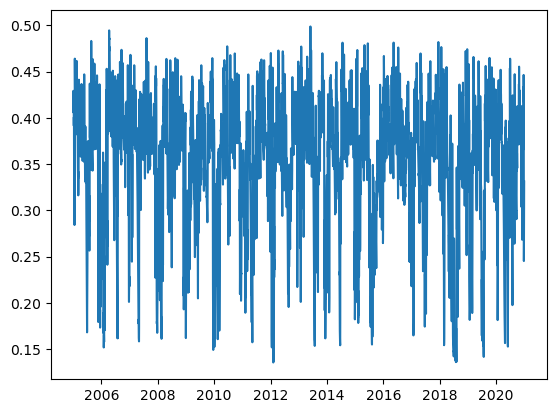

In [24]:
plt.plot(cha_daily['Date'], cha_daily['SM'])

 # Relationships between GPP and VPD

Text(0, 0.5, 'NPP')

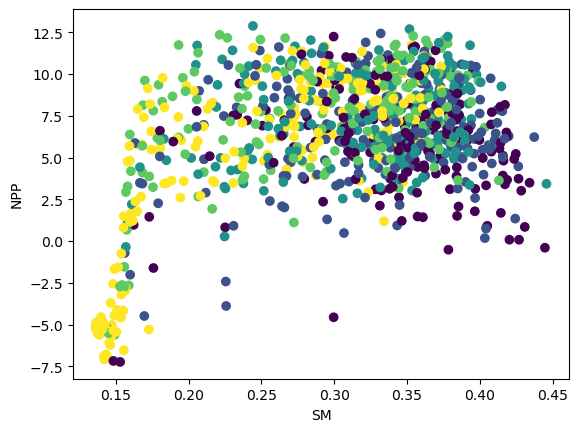

In [25]:
plt.scatter(cha_filtered['SM'], cha_filtered['NPP'], c=cha_filtered['VPD_bin']) #peut etre selectionner un treshold plus élevé pour VPD?
plt.xlabel('SM')
plt.ylabel('NPP')

The relationship is not clear, we should maybe use a higher threshold.

    SM_bin  VPD_bin       NPP       SIF
0        1        1  4.697607  0.079110
1        1        2  6.235506  0.158115
2        1        3  4.451588  0.164057
3        1        4  5.270620  0.262662
4        1        5  1.121560  0.123124
5        2        1  8.002719  0.212306
6        2        2  7.062946  0.094660
7        2        3  8.159838  0.240770
8        2        4  7.966947  0.144851
9        2        5  7.864084  0.169325
10       3        1  7.343244  0.235536
11       3        2  7.436075  0.096609
12       3        3  7.215436  0.322036
13       3        4  8.104728  0.428035
14       3        5  8.017600  0.498710
15       4        1  6.842356  0.247709
16       4        2  7.236322  0.438987
17       4        3  7.713759  0.421999
18       4        4  8.755074  0.564799
19       4        5  8.176447  0.481769
20       5        1  5.170708  0.156989
21       5        2  6.683388  0.207437
22       5        3  8.027362  0.365996
23       5        4  8.641652  0.410230


C:\Users\moeag\AppData\Local\Temp\ipykernel_11276\2828937438.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('coolwarm', 5)


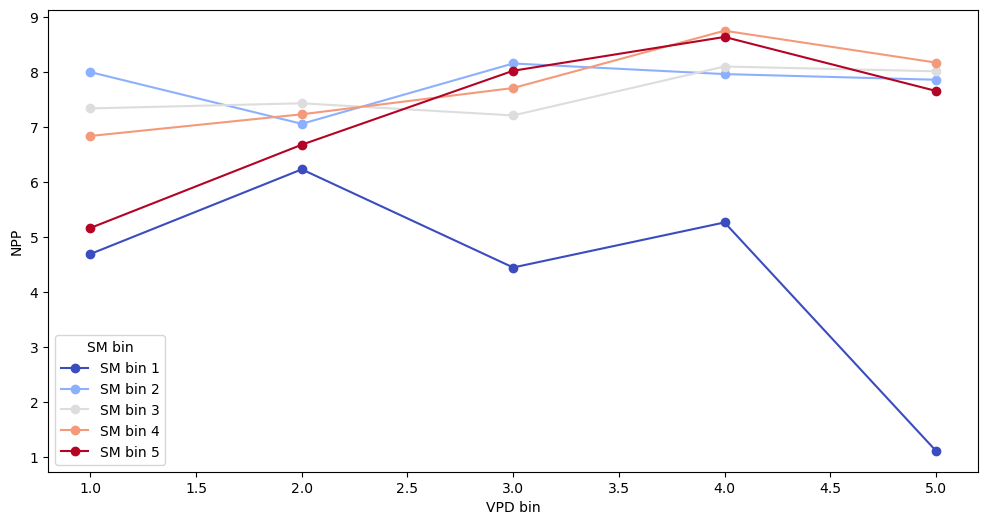

In [33]:
# for each combination of bins
grouped = cha_filtered.groupby(['SM_bin', 'VPD_bin'])[['NPP', 'SIF']].mean().reset_index()
print(grouped)

#graphe
plt.figure(figsize=(12, 6))
import matplotlib.cm as cm
cmap = cm.get_cmap('coolwarm', 5)

for i, sm_bin in enumerate(sorted(grouped['SM_bin'].unique())):
    subset = grouped[grouped['SM_bin'] == sm_bin]
    color = cmap(i)
    plt.plot(
        subset['VPD_bin'], 
        subset['NPP'], 
        marker='o', 
        label=f'SM bin {sm_bin}', 
        color=color
    )

plt.legend(title='SM bin')
plt.xlabel('VPD bin')
plt.ylabel('NPP')
plt.show()   

It is strange that GPP seems to increase with VPD

 # Relationships between GPP and soil moisture

Text(0, 0.5, 'NPP')

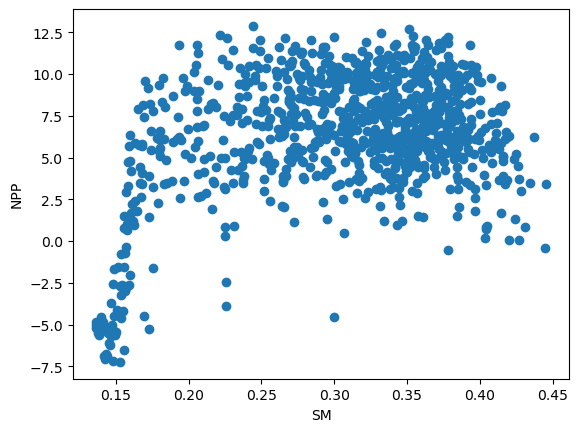

In [27]:
plt.scatter(cha_filtered['SM'], cha_filtered['NPP'])
plt.xlabel('SM')
plt.ylabel('NPP')

C:\Users\moeag\AppData\Local\Temp\ipykernel_11276\4124947001.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('coolwarm', 5)


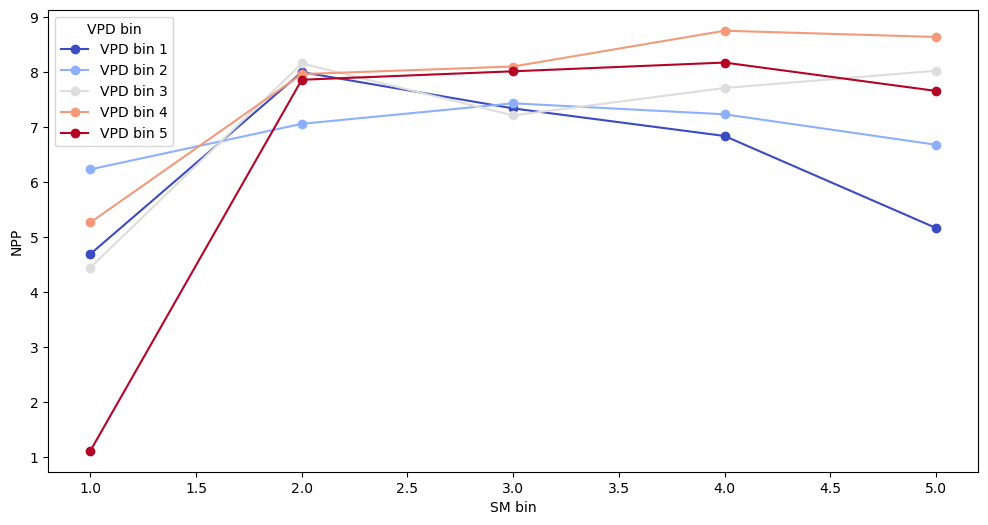

In [34]:
plt.figure(figsize=(12, 6))

cmap = cm.get_cmap('coolwarm', 5)

for i, vpd_bin in enumerate(sorted(grouped['VPD_bin'].unique())):
    subset = grouped[grouped['VPD_bin'] == vpd_bin]
    color = cmap(i)
    plt.plot(
        subset['SM_bin'], 
        subset['NPP'], 
        marker='o', 
        label=f'VPD bin {vpd_bin}', 
        color=color
    )
plt.legend(title='VPD bin')
plt.xlabel('SM bin')
plt.ylabel('NPP')
plt.show() 

Here, soil moisture more discriminant than VPD. 

# relationship between sif and sm

Text(0, 0.5, 'SIF')

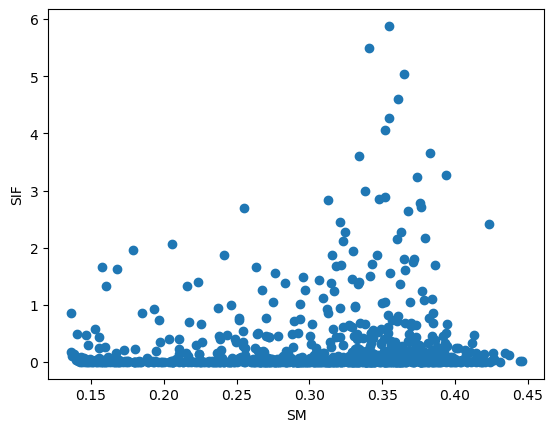

In [40]:
plt.scatter(cha_filtered['SM'], cha_filtered['SIF'])
plt.xlabel('SM')
plt.ylabel('SIF')

C:\Users\moeag\AppData\Local\Temp\ipykernel_11276\3627916602.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('coolwarm', 5)


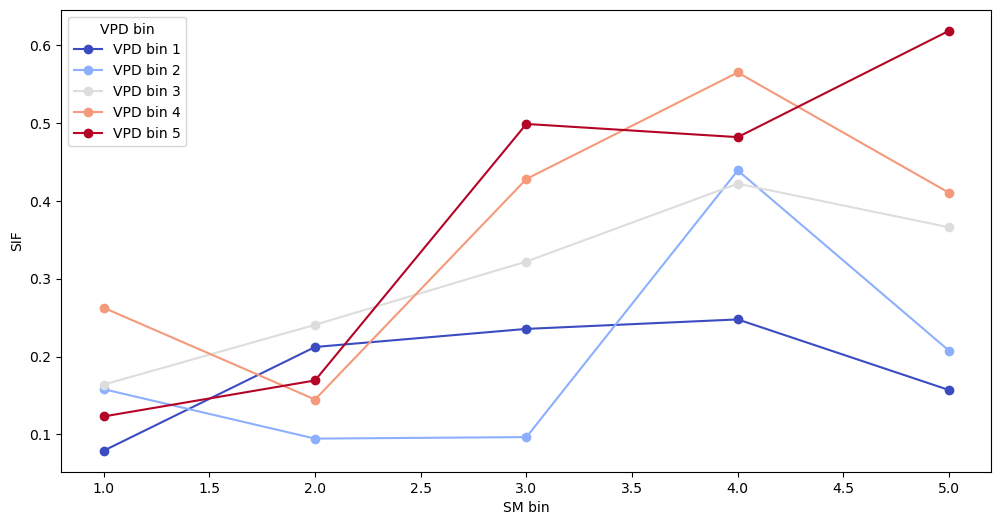

C:\Users\moeag\AppData\Local\Temp\ipykernel_11276\3627916602.py:22: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('coolwarm', 5)


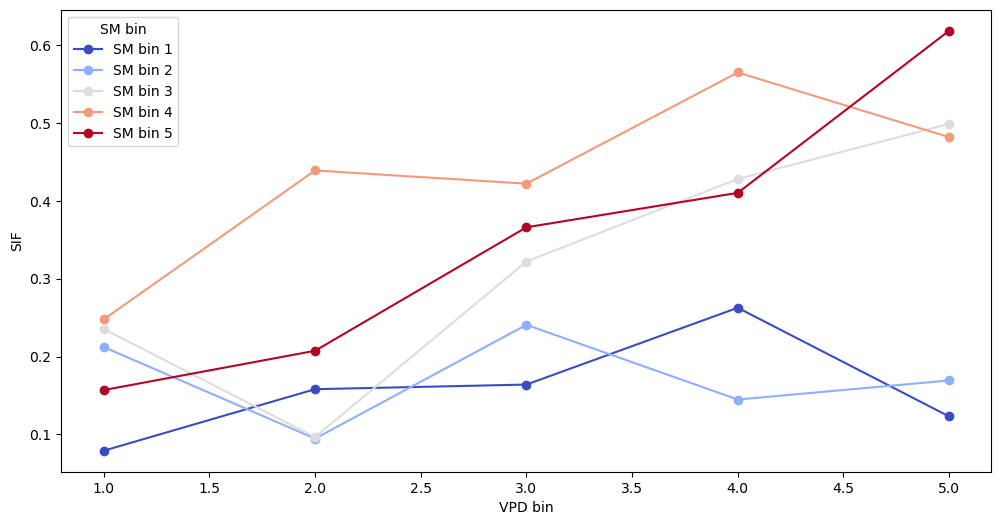

In [45]:
plt.figure(figsize=(12, 6))

cmap = cm.get_cmap('coolwarm', 5)

for i, vpd_bin in enumerate(sorted(grouped['VPD_bin'].unique())):
    subset = grouped[grouped['VPD_bin'] == vpd_bin]
    color = cmap(i)
    plt.plot(
        subset['SM_bin'], 
        subset['SIF'] ,
        marker='o', 
        label=f'VPD bin {vpd_bin}', 
        color=color
    )
plt.legend(title='VPD bin')
plt.xlabel('SM bin')
plt.ylabel('SIF')
plt.show() 

plt.figure(figsize=(12, 6))
import matplotlib.cm as cm
cmap = cm.get_cmap('coolwarm', 5)

for i, sm_bin in enumerate(sorted(grouped['SM_bin'].unique())):
    subset = grouped[grouped['SM_bin'] == sm_bin]
    color = cmap(i)
    plt.plot(
        subset['VPD_bin'], 
        subset['SIF'], 
        marker='o', 
        label=f'SM bin {sm_bin}', 
        color=color
    )

plt.legend(title='SM bin')
plt.xlabel('VPD bin')
plt.ylabel('SIF')
plt.show()   

# Heatmap

<Axes: xlabel='SM_bin', ylabel='VPD_bin'>

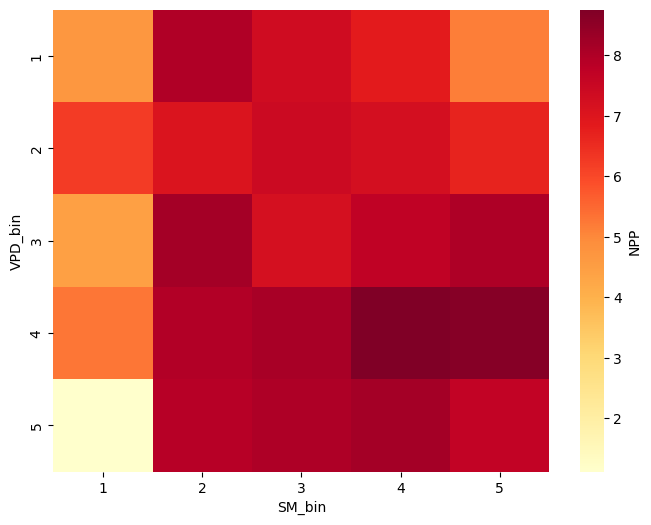

In [44]:
pivot_table = grouped.pivot(index='VPD_bin', columns='SM_bin', values='NPP')

plt.figure(figsize=(8, 6))

sns.heatmap(
    pivot_table,
    cmap='YlOrRd',
    annot=False, #change in true if we want to see the values
    fmt=".2f",
    cbar_kws={'label': 'NPP'}
)

It is strange that GPP seems to increase with VPD. However, we also see that SM is discriminant here.

# verification

In [68]:
bin_values = cha_filtered.groupby(['SM_bin', 'VPD_bin']).agg(
    mean_NPP=('NPP', 'mean'),
    mean_SM=('SM', 'mean'),
    mean_VPD=('VPD', 'mean'),
    count=('NPP', 'count')  # ou 'size' si tu veux compter même les NaN
).reset_index()

print(bin_values.sort_values(by=['mean_NPP']))

    SM_bin  VPD_bin  mean_NPP   mean_SM     mean_VPD  count
4        1        5  1.121560  0.173003  1257.144689     81
2        1        3  4.451588  0.202049   758.741936     23
0        1        1  4.697607  0.222362   554.379969      8
20       5        1  5.170708  0.400106   548.009090     56
3        1        4  5.270620  0.191741   899.822712     44
1        1        2  6.235506  0.206994   655.485009     20
21       5        2  6.683388  0.393243   650.090577     59
15       4        1  6.842356  0.357901   544.869380     47
6        2        2  7.062946  0.275157   655.369915     32
12       3        3  7.215436  0.325169   759.209371     39
16       4        2  7.236322  0.355624   640.988590     35
10       3        1  7.343244  0.322801   551.493124     36
11       3        2  7.436075  0.324408   647.187558     30
24       5        5  7.661290  0.375920  1110.751139      3
17       4        3  7.713759  0.355672   754.955466     45
9        2        5  7.864084  0.275860 

# VPD limitation on GPP without coupling and same for SM (figure 3f, Liu et al.) TO IMPROVE

We used the approach 1 : we calculate the difference between SIF at the highest VPD bin and lowest VPD bin in each SM bin to derive the .SIF(VPD|SM) cf paper for the complete calcul

We could have used the 2nd approach, but we estimated that there were not enough points to do a linear regression, and it is the 1st approach that is shown in their paper.

However, considering the irregular relationship between GPP and VPD, we could have used approach 2 to smooth a bit, or a non linear approach

In [ ]:
# for each bin of SM, difference of GPP between max bin vpd and min bin vpd
delta_gpp_vpd = []
for sm_bin in sorted(grouped['SM_bin'].unique()):
    subset = grouped[grouped['SM_bin'] == sm_bin]
    
    if not subset.empty:
        min_vpd_bin = subset['VPD_bin'].min()
        max_vpd_bin = subset['VPD_bin'].max()

        gpp_min = subset[subset['VPD_bin'] == min_vpd_bin]['GPP'].values
        gpp_max = subset[subset['VPD_bin'] == max_vpd_bin]['GPP'].values

        if len(gpp_min) > 0 and len(gpp_max) > 0:
            delta = gpp_max[0] - gpp_min[0]
            delta_gpp_vpd.append({'SM_bin': sm_bin, 'delta_gpp_vpd': delta})

delta_gpp_vpd_df = pd.DataFrame(delta_gpp_vpd)

delta_gpp_vpd_df

,SM_bin,delta_gpp_vpd
0,1,2.614363
1,2,4.164804
2,3,4.623237
3,4,5.264993
4,5,8.709358
5,6,11.222955
6,7,10.189722
7,8,15.141427
8,9,11.781687
9,10,11.974750


In [ ]:
delta_gpp_sm = []

for vpd_bin in sorted(grouped['VPD_bin'].unique()):
    subset = grouped[grouped['VPD_bin'] == vpd_bin]
    
    if not subset.empty:
        min_sm_bin = subset['SM_bin'].min()
        max_sm_bin = subset['SM_bin'].max()

        gpp_min = subset[subset['SM_bin'] == min_sm_bin]['GPP'].values
        gpp_max = subset[subset['SM_bin'] == max_sm_bin]['GPP'].values

        if len(gpp_min) > 0 and len(gpp_max) > 0:
            delta = gpp_max[0] - gpp_min[0]
            delta_gpp_sm.append({'VPD_bin': vpd_bin, 'delta_gpp_sm': delta})

delta_gpp_sm_df = pd.DataFrame(delta_gpp_sm)

delta_gpp_sm_df

,VPD_bin,delta_gpp_sm
0,1,6.375977
1,2,5.685878
2,3,10.924427
3,4,6.481404
4,5,4.376720
5,6,8.850573
6,7,7.394696
7,8,9.293918
8,9,15.009371
9,10,14.552323


(1.6143634278038066, 16.14142710848528)

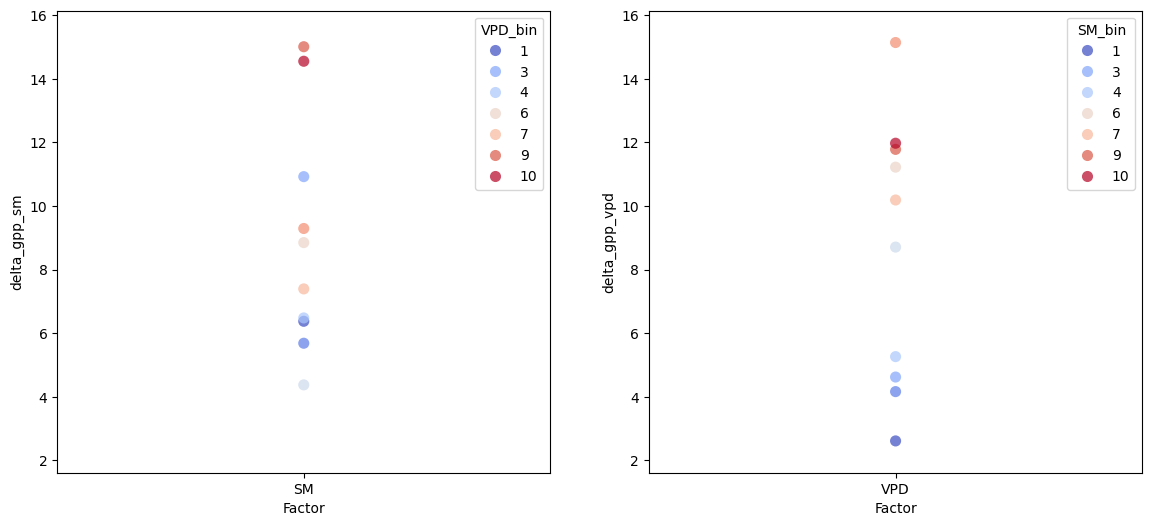

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Graphique pour delta_gpp_sm en fonction des bins VPD
delta_gpp_sm_df['Factor'] = 'SM'
sns.stripplot(x='Factor', y='delta_gpp_sm', data=delta_gpp_sm_df, hue='VPD_bin', 
              palette='coolwarm', jitter=False,  size=8, alpha=0.7, ax=axes[0])

# Graphique pour delta_gpp_vpd en fonction des bins SM
delta_gpp_vpd_df['Factor'] = 'VPD'
sns.stripplot(x='Factor', y='delta_gpp_vpd', data=delta_gpp_vpd_df, hue='SM_bin', 
              palette='coolwarm', jitter=False, size=8, alpha=0.7, ax=axes[1])

#  même échelle
y_min = min(delta_gpp_sm_df['delta_gpp_sm'].min(), delta_gpp_vpd_df['delta_gpp_vpd'].min())
y_max = max(delta_gpp_sm_df['delta_gpp_sm'].max(), delta_gpp_vpd_df['delta_gpp_vpd'].max())

axes[0].set_ylim(y_min-1, y_max+1)  # Échelle des ordonnées pour le premier graphique
axes[1].set_ylim(y_min-1, y_max+1)  # Échelle des ordonnées pour le deuxième graphique


# Application to Laegeren

## Basic code

            Ta        VPD        SM  PARB  PARD  PAR                Date  \
0      -2.0850  11.533996  0.368520   0.0   0.0  0.0 2005-01-01 00:00:00   
1      -1.6650   5.948903  0.368496   0.0   0.0  0.0 2005-01-01 01:00:00   
2      -1.2460   6.135417  0.368488   0.0   0.0  0.0 2005-01-01 02:00:00   
3      -0.9850   6.254197  0.368495   0.0   0.0  0.0 2005-01-01 03:00:00   
4      -0.9035   5.719729  0.368512   0.0   0.0  0.0 2005-01-01 04:00:00   
...        ...        ...       ...   ...   ...  ...                 ...   
140251 -0.0970   0.012134  0.387809   0.0   0.0  0.0 2020-12-31 19:00:00   
140252  0.1760   0.012377  0.387893   0.0   0.0  0.0 2020-12-31 20:00:00   
140253  0.3345   0.012521  0.387990   0.0   0.0  0.0 2020-12-31 21:00:00   
140254  0.4765   0.012650  0.388044   0.0   0.0  0.0 2020-12-31 22:00:00   
140255  0.6000   0.012764  0.388207   0.0   0.0  0.0 2020-12-31 23:00:00   

          Date_day  Year  Month  Day  Hour  
0       2005-01-01  2005      1    1     0

C:\Users\moeag\AppData\Local\Temp\ipykernel_11276\226748178.py:17: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  date_range = pd.date_range(start=start_date, periods=len(lae), freq='H')


Text(0, 0.5, 'NPP')

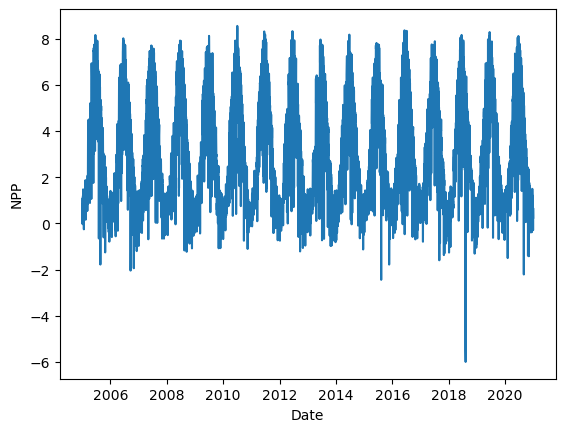

In [46]:
## Load data
lae_mat= h5py.File("LAEGEREN.mat", 'r')
lae_mat

lae = pd.DataFrame(
    { 
        'Ta': lae_mat['Ta'][8784:].squeeze(),
        'VPD': lae_mat['Ds'][8784:].squeeze(), #in Pa
        'SM': lae_mat['OH'][0][8784:].squeeze(), # first soil layer (surface) #high veget #OL=low veget
         'PARB': lae_mat['PARB'][8784:].squeeze(), #direct radiation
        'PARD': lae_mat['PARD'][8784:].squeeze(), #diffuse radiation
    }
)
lae['PAR']= lae['PARB'] + lae['PARD']

start_date = '2005-01-01 00:00:00' # de 2005 à 2020
date_range = pd.date_range(start=start_date, periods=len(lae), freq='H')
lae['Date'] = date_range
lae['Date_day'] = lae['Date'].dt.date
lae['Year'] = lae['Date'].dt.year
lae['Month'] = lae['Date'].dt.month
lae['Day'] = lae['Date'].dt.day
lae['Hour'] = lae['Date'].dt.hour

#les data ne vont que jusqu'à 2020 dans lae alors qu'elles vont jusqu'à 2023 dans les données de base
print(lae)


## Daily mean
# Groupby day to have daily mean
lae_daily = lae.groupby('Date_day')[['Ta','VPD','SM', 'PAR']].mean().reset_index()

#rearrange
lae_daily.rename(columns={'Date_day': 'Date'}, inplace=True)
lae_daily['Date'] = pd.to_datetime(lae_daily['Date'])
lae_daily['Year'] = lae_daily['Date'].dt.year
lae_daily['Month'] = lae_daily['Date'].dt.month
lae_daily['Day'] = lae_daily['Date'].dt.day

lae_daily['NPP'] = lae_mat['NPP_H'][1][367:] #high because mixed deciduous mountain forest #there were 2 columns, I took the one with positive values

plt.plot(lae_daily['Date'], lae_daily['NPP'])
plt.xlabel('Date')
plt.ylabel('NPP')

<Axes: >

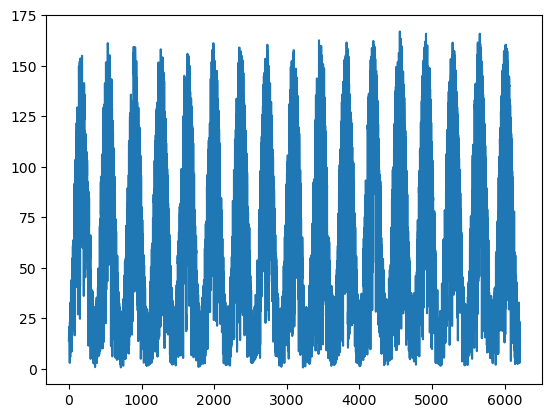

In [81]:
lae_daily['PAR'].plot()

           Date         Ta          VPD        SM         PAR  Year  Month  \
120  2005-05-01  19.705000  1357.441740  0.412870  129.771703  2005      5   
121  2005-05-02  19.543750  1353.324353  0.406859  112.818470  2005      5   
139  2005-05-20  15.508125   938.931215  0.419528  140.529161  2005      5   
144  2005-05-25  17.109792  1033.142171  0.398882  151.556068  2005      5   
145  2005-05-26  20.582708  1340.009452  0.391959  151.541395  2005      5   
...         ...        ...          ...       ...         ...   ...    ...   
5732 2020-09-11  19.164146   597.491739  0.316329  106.669422  2020      9   
5733 2020-09-12  20.880917   842.807055  0.311564  108.241019  2020      9   
5734 2020-09-13  21.379354   842.983108  0.306956  102.742977  2020      9   
5735 2020-09-14  22.308854   899.622597  0.302196  104.624759  2020      9   
5736 2020-09-15  22.860479   988.152268  0.297501  102.645323  2020      9   

      Day       NPP  
120     1  6.929200  
121     2  6.475855

C:\Users\moeag\AppData\Local\Temp\ipykernel_11276\552120194.py:38: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('coolwarm', 10)


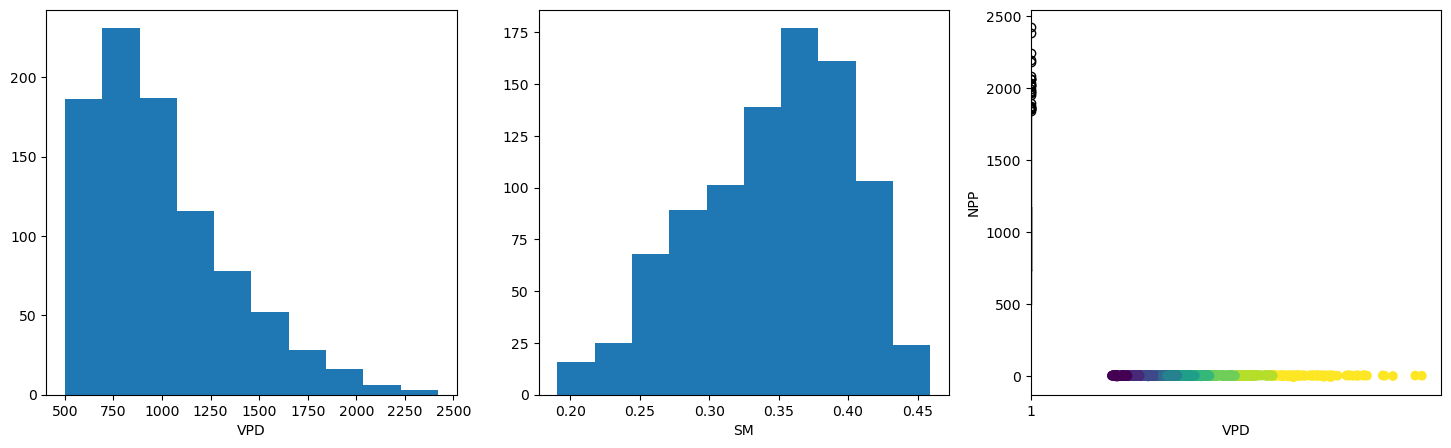

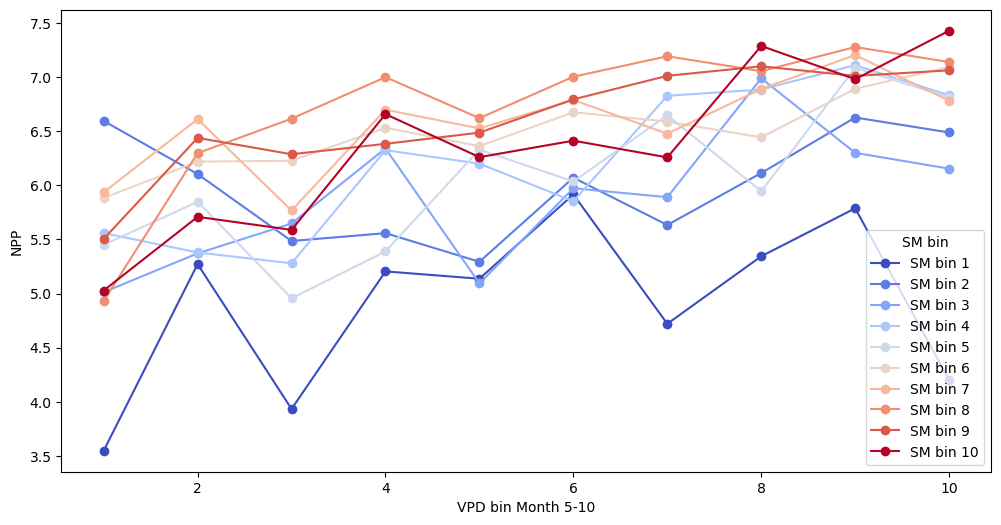

C:\Users\moeag\AppData\Local\Temp\ipykernel_11276\552120194.py:63: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('coolwarm', 10)


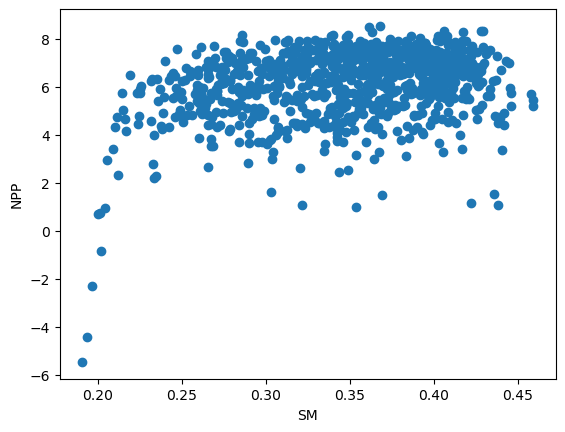

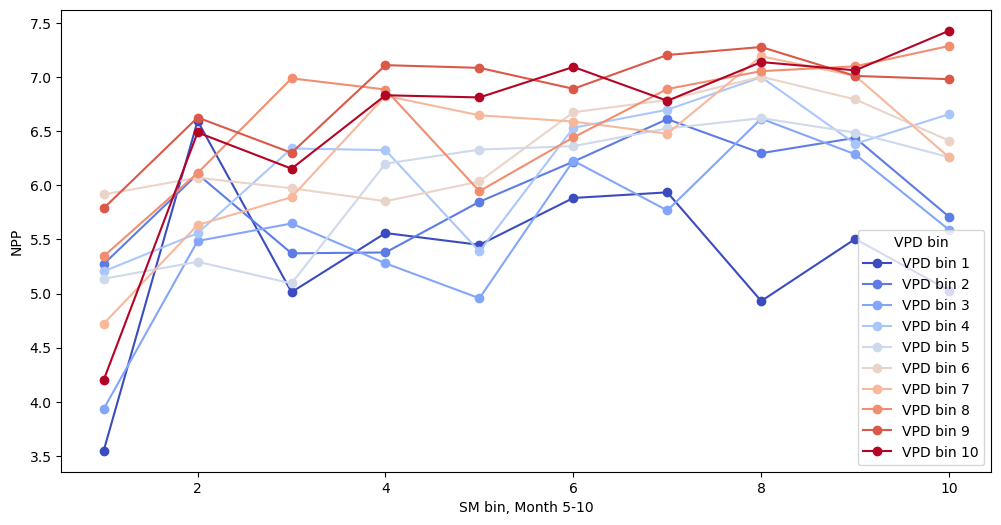

<Axes: xlabel='SM_bin', ylabel='VPD_bin'>

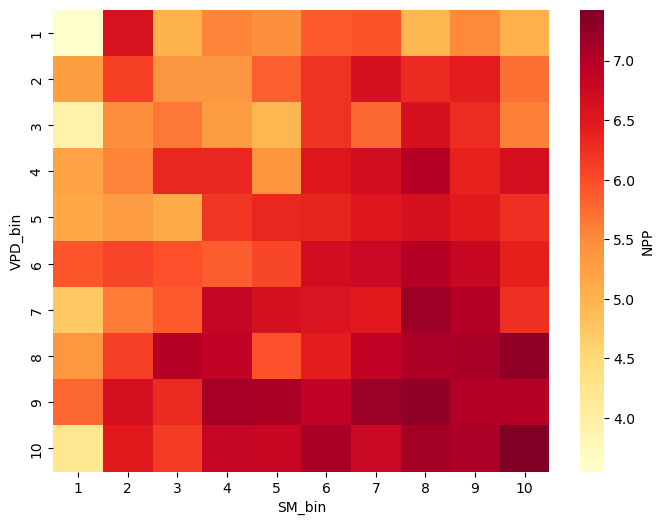

In [48]:
## Filter data
lae_filtered=lae_daily[(lae_daily['VPD']>500) & (lae_daily['Ta']>15) & (lae_daily['PAR']>100) & (lae_daily['Month'].isin([5,6,7,8, 9, 10]))]
#& (cha_daily['PAR']>75)
#if months are 4-7: more linear relationship
print(lae_filtered)


## Divide in bins
# Histogrammes
plt.figure(figsize=(18, 5))
plt.subplot(1, 3, 1)
plt.hist(lae_filtered['VPD'])
plt.xlabel('VPD')
plt.subplot(1, 3, 2)
plt.hist(lae_filtered['SM'])
plt.xlabel('SM')
plt.subplot(1, 3, 3)
plt.boxplot(lae_filtered['VPD'])
plt.xlabel('VPD')

#Divide in bins
lae_filtered = lae_filtered.copy() #to have an explicit copy (if not it raises an error)
lae_filtered['SM_bin'] = pd.qcut(lae_filtered['SM'], q=10, labels=False) + 1  # labels from 1 to 10 # Quantile-based discretization function.
lae_filtered['VPD_bin'] = pd.qcut(lae_filtered['VPD'], q=10, labels=False) + 1
print(lae_filtered)

## Relationships between NPP and VPD
plt.scatter(lae_filtered['VPD'], lae_filtered['NPP'], c=lae_filtered['VPD_bin']) #peut etre selectionner un treshold plus élevé pour VPD?
plt.xlabel('VPD')
plt.ylabel('NPP')

# for each combination of bins
grouped = lae_filtered.groupby(['SM_bin', 'VPD_bin'])['NPP'].mean().reset_index()

#graphe
plt.figure(figsize=(12, 6))
import matplotlib.cm as cm
cmap = cm.get_cmap('coolwarm', 10)

for i, sm_bin in enumerate(sorted(grouped['SM_bin'].unique())):
    subset = grouped[grouped['SM_bin'] == sm_bin]
    color = cmap(i)
    plt.plot(
        subset['VPD_bin'], 
        subset['NPP'], 
        marker='o', 
        label=f'SM bin {sm_bin}', 
        color=color
    )

plt.legend(title='SM bin')
plt.xlabel('VPD bin Month 5-10')
plt.ylabel('NPP')
plt.show()

## Relationship between NPP and soil moisture
plt.scatter(lae_filtered['SM'], lae_filtered['NPP'])
plt.xlabel('SM')
plt.ylabel('NPP')

plt.figure(figsize=(12, 6))

cmap = cm.get_cmap('coolwarm', 10)

for i, vpd_bin in enumerate(sorted(grouped['VPD_bin'].unique())):
    subset = grouped[grouped['VPD_bin'] == vpd_bin]
    color = cmap(i)
    plt.plot(
        subset['SM_bin'], 
        subset['NPP'], 
        marker='o', 
        label=f'VPD bin {vpd_bin}', 
        color=color
    )
plt.legend(title='VPD bin')
plt.xlabel('SM bin, Month 5-10')
plt.ylabel('NPP')
plt.show() 

## Heatmap
pivot_table = grouped.pivot(index='VPD_bin', columns='SM_bin', values='NPP')

plt.figure(figsize=(8, 6))

sns.heatmap(
    pivot_table,
    cmap='YlOrRd',
    annot=False, #change in true if we want to see the values
    fmt=".2f",
    cbar_kws={'label': 'NPP'}
)


## Resolving the problem

In [86]:
SM1VPD1 = lae_filtered[(lae_filtered['SM_bin'] == 1) & (lae_filtered['VPD_bin'] == 1)]

# Afficher les dates correspondantes
print(SM1VPD1[['Date']])

           Date
3537 2013-09-07


In [87]:
SM_bin_values = lae_filtered.groupby(['SM_bin', 'VPD_bin']).agg(
    mean_NPP=('NPP', 'mean'),
    mean_SM=('SM', 'mean'),
    mean_VPD=('VPD', 'mean'),
    count=('NPP', 'count')  # ou 'size' si tu veux compter même les NaN
).reset_index()

print(SM_bin_values)


# VPD_bin_values = merged_filtered.groupby(['VPD_bin']).agg({
#     'NPP': 'mean',
#     'SM': 'mean',      # Moyenne de SM dans le bin
#     'VPD': 'mean'      # Moyenne de VPD dans le bin
# }).reset_index()
# print(VPD_bin_values)

    SM_bin  VPD_bin  mean_NPP   mean_SM     mean_VPD  count
0        1        1  4.433512  0.245567   520.744356      1
1        1        2  6.470088  0.301595   601.170344      1
2        1        3  6.226560  0.262194   638.367208      2
3        1        4  6.200179  0.290798   726.817637      4
4        1        5  5.515425  0.287729   782.471337      4
..     ...      ...       ...       ...          ...    ...
93      10        6  6.691567  0.423472   857.128499      7
94      10        7  6.646651  0.427337   937.065980      4
95      10        8  6.747862  0.420634  1071.950683      2
96      10        9  7.488051  0.429269  1193.077202      4
97      10       10  7.292520  0.422322  1558.885589      1

[98 rows x 6 columns]


C:\Users\moeag\AppData\Local\Temp\ipykernel_31948\3958752040.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  lae_daily_year=cha_daily[(lae_daily['Year'] == 2005)]


Text(0, 0.5, 'NPP')

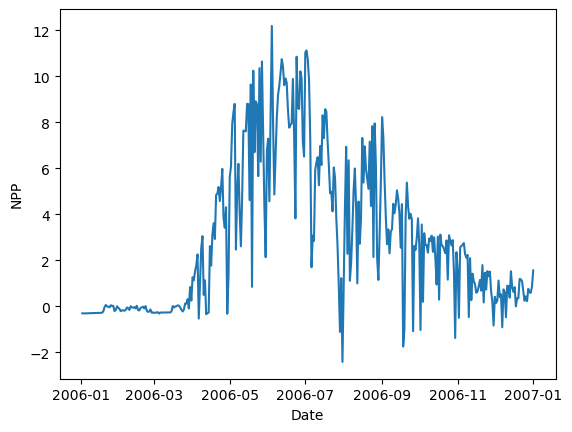

In [90]:
lae_daily_year=cha_daily[(lae_daily['Year'] == 2005)]

plt.plot(lae_daily_year['Date'], lae_daily_year['NPP'])
plt.xlabel('Date')
plt.ylabel('NPP')

# Application to Davos

            Ta         VPD        SM  PARB  PARD  PAR                Date  \
0      -5.0670   76.080351  0.166484   0.0   0.0  0.0 2004-01-01 00:00:00   
1      -3.9170   63.177543  0.166537   0.0   0.0  0.0 2004-01-01 01:00:00   
2      -3.7165   35.263719  0.166616   0.0   0.0  0.0 2004-01-01 02:00:00   
3      -4.5335   21.758387  0.166707   0.0   0.0  0.0 2004-01-01 03:00:00   
4      -4.3500   24.739820  0.166785   0.0   0.0  0.0 2004-01-01 04:00:00   
...        ...         ...       ...   ...   ...  ...                 ...   
140251 -6.2950  185.782946  0.110803   0.0   0.0  0.0 2019-12-31 19:00:00   
140252 -6.3430  176.417121  0.110805   0.0   0.0  0.0 2019-12-31 20:00:00   
140253 -6.3925  185.053060  0.110801   0.0   0.0  0.0 2019-12-31 21:00:00   
140254 -6.4425  180.934429  0.110783   0.0   0.0  0.0 2019-12-31 22:00:00   
140255 -6.4920  175.172163  0.110754   0.0   0.0  0.0 2019-12-31 23:00:00   

          Date_day  Year  Month  Day  Hour  
0       2004-01-01  2004      

C:\Users\moeag\AppData\Local\Temp\ipykernel_11276\3668293536.py:17: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  date_range = pd.date_range(start=start_date, periods=len(dav), freq='H')


Text(0, 0.5, 'NPP')

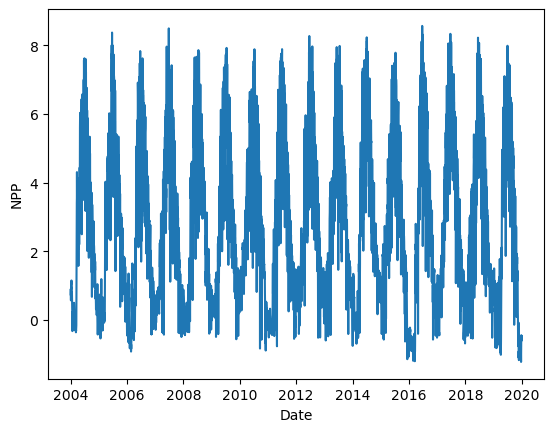

In [49]:
## Load data (1997- 2020)
dav_mat= h5py.File("DAVOS.mat", 'r')
dav_mat

dav = pd.DataFrame(
    { 
        'Ta': dav_mat['Ta'][8784:].squeeze(), #from 2005 and not 2004
        'VPD': dav_mat['Ds'][8784:].squeeze(), #in Pa
        'SM': dav_mat['OH'][0][8784:].squeeze(), # first soil layer (surface) #high veget #OL=low veget
         'PARB': dav_mat['PARB'][8784:].squeeze(), #direct radiation
        'PARD': dav_mat['PARD'][8784:].squeeze(), #diffuse radiation
    }
)
dav['PAR']= dav['PARB'] + dav['PARD']

start_date = '2004-01-01 00:00:00' # de 2004 à 2023
date_range = pd.date_range(start=start_date, periods=len(dav), freq='H')
dav['Date'] = date_range
dav['Date_day'] = dav['Date'].dt.date
dav['Year'] = dav['Date'].dt.year
dav['Month'] = dav['Date'].dt.month
dav['Day'] = dav['Date'].dt.day
dav['Hour'] = dav['Date'].dt.hour

#les data ne vont que jusqu'à 2016 dans davMAU alors qu'elles vont jusqu'à 2023 dans les données de base
print(dav)


## Daily mean
# Groupby day to have daily mean
dav_daily = dav.groupby('Date_day')[['Ta','VPD','SM', 'PAR']].mean().reset_index()

#rearrange
dav_daily.rename(columns={'Date_day': 'Date'}, inplace=True)
dav_daily['Date'] = pd.to_datetime(dav_daily['Date'])
dav_daily['Year'] = dav_daily['Date'].dt.year
dav_daily['Month'] = dav_daily['Date'].dt.month
dav_daily['Day'] = dav_daily['Date'].dt.day

dav_daily['NPP'] = dav_mat['NPP_H'][1][367:] #high because mixed deciduous mountain forest #there were 2 columns, I took the one with positive values

plt.plot(dav_daily['Date'], dav_daily['NPP'])
plt.xlabel('Date')
plt.ylabel('NPP')

<Axes: >

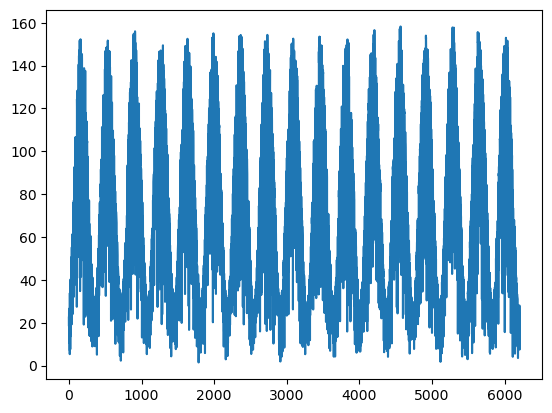

In [99]:
dav_daily['PAR'].plot()

           Date         Ta          VPD        SM         PAR  Year  Month  \
146  2004-05-26  15.832021  1032.125105  0.382312  147.059326  2004      5   
170  2004-06-19  16.047271  1020.571412  0.426404  151.618448  2004      6   
171  2004-06-20  16.448562  1026.060211  0.427103  133.027997  2004      6   
172  2004-06-21  16.914521  1029.480674  0.428128  137.312106  2004      6   
173  2004-06-22  17.959688  1165.430058  0.429286  143.384665  2004      6   
...         ...        ...          ...       ...         ...   ...    ...   
5698 2019-08-08  16.909896   876.777412  0.229891  129.284775  2019      8   
5699 2019-08-09  17.443979   966.829936  0.227775  129.262547  2019      8   
5702 2019-08-12  16.475188   675.279901  0.223029  102.083142  2019      8   
5710 2019-08-20  17.616208   825.719576  0.219986  125.254784  2019      8   
5711 2019-08-21  18.700917  1027.483149  0.218397  119.038011  2019      8   

      Day       NPP  
146    26  6.113996  
170    19  6.581005

C:\Users\moeag\AppData\Local\Temp\ipykernel_11276\1521840914.py:38: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('coolwarm', 10)


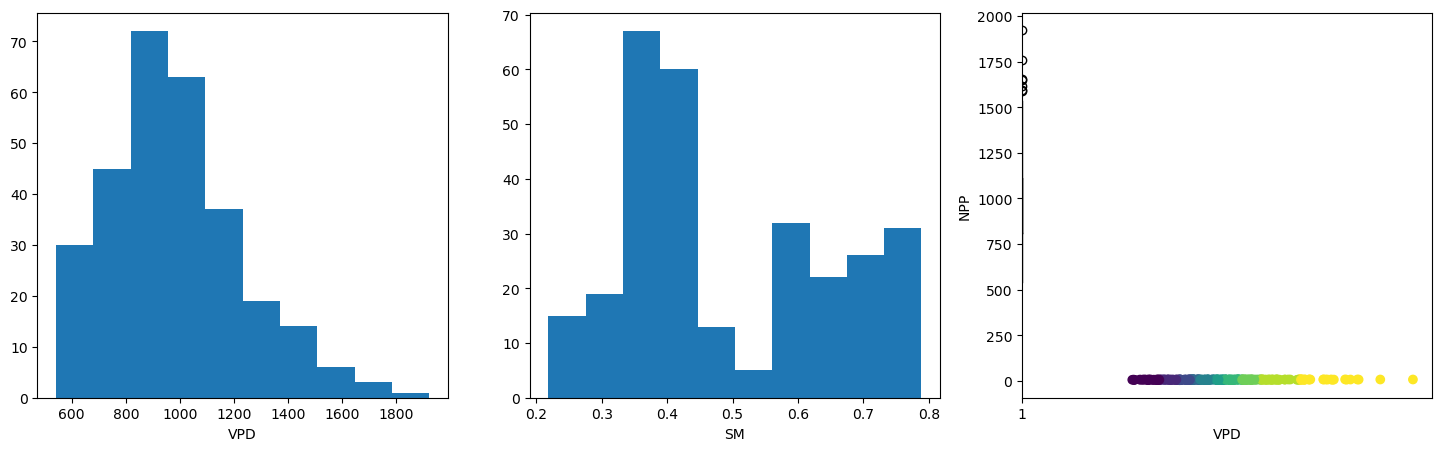

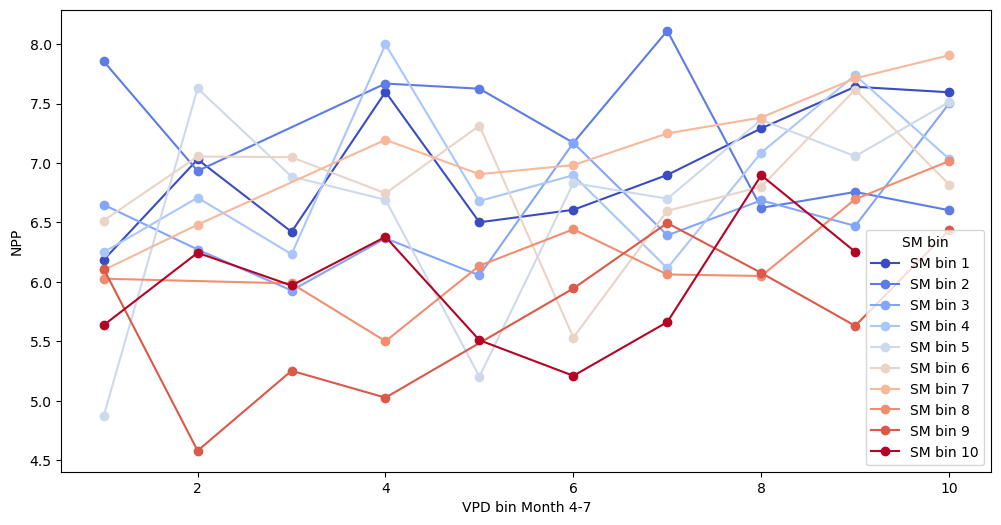

C:\Users\moeag\AppData\Local\Temp\ipykernel_11276\1521840914.py:63: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('coolwarm', 10)


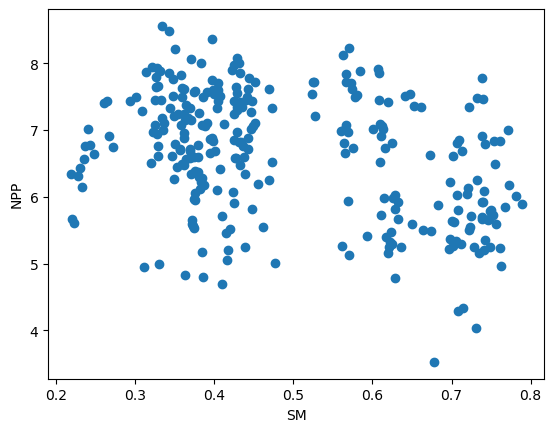

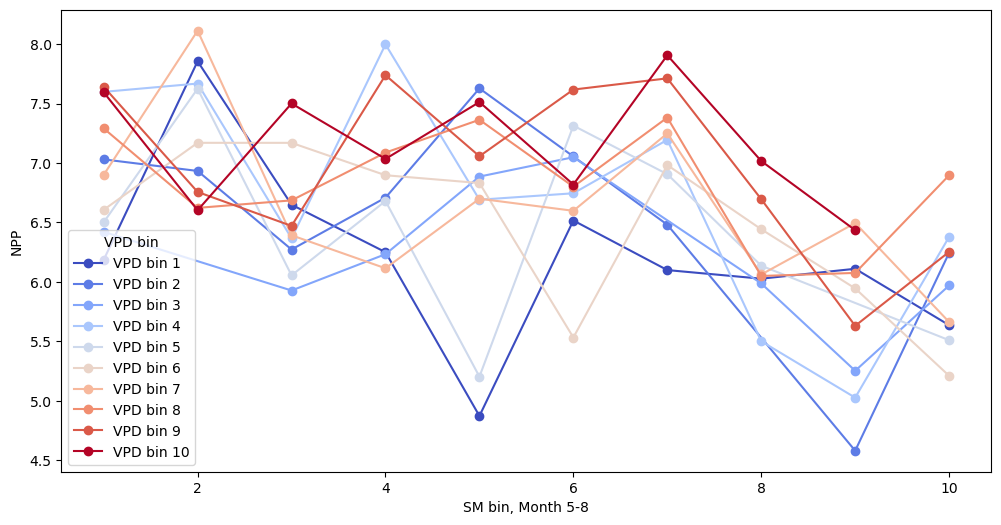

<Axes: xlabel='SM_bin', ylabel='VPD_bin'>

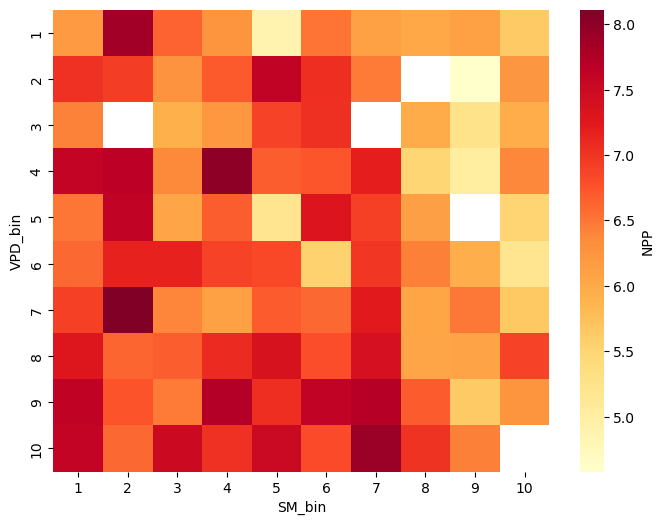

In [50]:
## Filter data
dav_filtered=dav_daily[(dav_daily['VPD']>500) & (dav_daily['Ta']>15) & (dav_daily['PAR']>100) & (dav_daily['Month'].isin([5,6,7,8, 9, 10]))]
#& (dav_daily['PAR']>60)
#if months are 4-7: more linear relationship
print(dav_filtered)


## Divide in bins
# Histogrammes
plt.figure(figsize=(18, 5))
plt.subplot(1, 3, 1)
plt.hist(dav_filtered['VPD'])
plt.xlabel('VPD')
plt.subplot(1, 3, 2)
plt.hist(dav_filtered['SM'])
plt.xlabel('SM')
plt.subplot(1, 3, 3)
plt.boxplot(dav_filtered['VPD'])
plt.xlabel('VPD')

#Divide in bins
dav_filtered = dav_filtered.copy() #to have an explicit copy (if not it raises an error)
dav_filtered['SM_bin'] = pd.qcut(dav_filtered['SM'], q=10, labels=False) + 1  # labels from 1 to 10 # Quantile-based discretization function.
dav_filtered['VPD_bin'] = pd.qcut(dav_filtered['VPD'], q=10, labels=False) + 1
print(dav_filtered)

## Relationships between NPP and VPD
plt.scatter(dav_filtered['VPD'], dav_filtered['NPP'], c=dav_filtered['VPD_bin']) #peut etre selectionner un treshold plus élevé pour VPD?
plt.xlabel('VPD')
plt.ylabel('NPP')

# for each combination of bins
grouped = dav_filtered.groupby(['SM_bin', 'VPD_bin'])['NPP'].mean().reset_index()

#graphe
plt.figure(figsize=(12, 6))
import matplotlib.cm as cm
cmap = cm.get_cmap('coolwarm', 10)

for i, sm_bin in enumerate(sorted(grouped['SM_bin'].unique())):
    subset = grouped[grouped['SM_bin'] == sm_bin]
    color = cmap(i)
    plt.plot(
        subset['VPD_bin'], 
        subset['NPP'], 
        marker='o', 
        label=f'SM bin {sm_bin}', 
        color=color
    )

plt.legend(title='SM bin')
plt.xlabel('VPD bin Month 4-7')
plt.ylabel('NPP')
plt.show()

## Relationship between NPP and soil moisture
plt.scatter(dav_filtered['SM'], dav_filtered['NPP'])
plt.xlabel('SM')
plt.ylabel('NPP')

plt.figure(figsize=(12, 6))

cmap = cm.get_cmap('coolwarm', 10)

for i, vpd_bin in enumerate(sorted(grouped['VPD_bin'].unique())):
    subset = grouped[grouped['VPD_bin'] == vpd_bin]
    color = cmap(i)
    plt.plot(
        subset['SM_bin'], 
        subset['NPP'], 
        marker='o', 
        label=f'VPD bin {vpd_bin}', 
        color=color
    )
plt.legend(title='VPD bin')
plt.xlabel('SM bin, Month 5-8')
plt.ylabel('NPP')
plt.show() 

## Heatmap
pivot_table = grouped.pivot(index='VPD_bin', columns='SM_bin', values='NPP')

plt.figure(figsize=(8, 6))

sns.heatmap(
    pivot_table,
    cmap='YlOrRd',
    annot=False, #change in true if we want to see the values
    fmt=".2f",
    cbar_kws={'label': 'NPP'}
)

C:\Users\moeag\AppData\Local\Temp\ipykernel_31948\1377945273.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dav_daily_year=cha_daily[(dav_daily['Year'] == 2005)]


Text(0, 0.5, 'NPP')

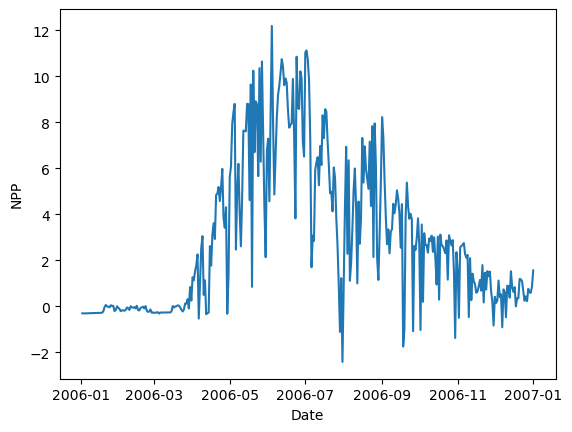

In [91]:
dav_daily_year=cha_daily[(dav_daily['Year'] == 2005)]

plt.plot(dav_daily_year['Date'], dav_daily_year['NPP'])
plt.xlabel('Date')
plt.ylabel('NPP')

# Merging the 3 stations

            Date         Ta          VPD        SM         PAR  Year  Month  \
144   2005-05-25  16.486125   541.790846  0.394809  139.774863  2005      5   
145   2005-05-26  19.077437   654.859749  0.376440  148.673829  2005      5   
146   2005-05-27  21.047333   690.378347  0.364712  143.816213  2005      5   
147   2005-05-28  21.948625   772.772026  0.354944  150.480336  2005      5   
148   2005-05-29  21.980708   723.018001  0.351671  140.704514  2005      5   
...          ...        ...          ...       ...         ...   ...    ...   
17386 2019-08-08  16.909896   876.777412  0.229891  129.284775  2019      8   
17387 2019-08-09  17.443979   966.829936  0.227775  129.262547  2019      8   
17390 2019-08-12  16.475188   675.279901  0.223029  102.083142  2019      8   
17398 2019-08-20  17.616208   825.719576  0.219986  125.254784  2019      8   
17399 2019-08-21  18.700917  1027.483149  0.218397  119.038011  2019      8   

       Day        NPP       SIF  SM_bin  VPD_bin  


C:\Users\moeag\AppData\Local\Temp\ipykernel_11276\1972120826.py:24: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('coolwarm', 5)


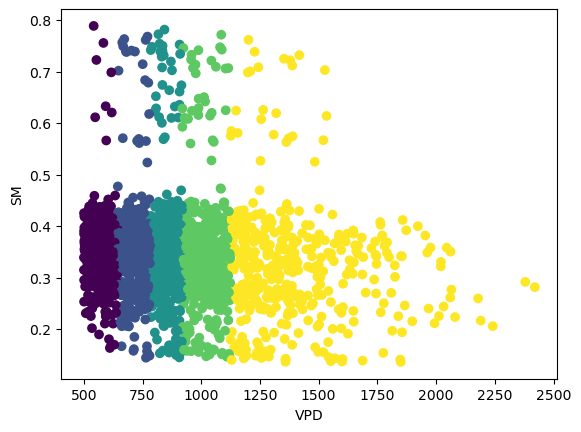

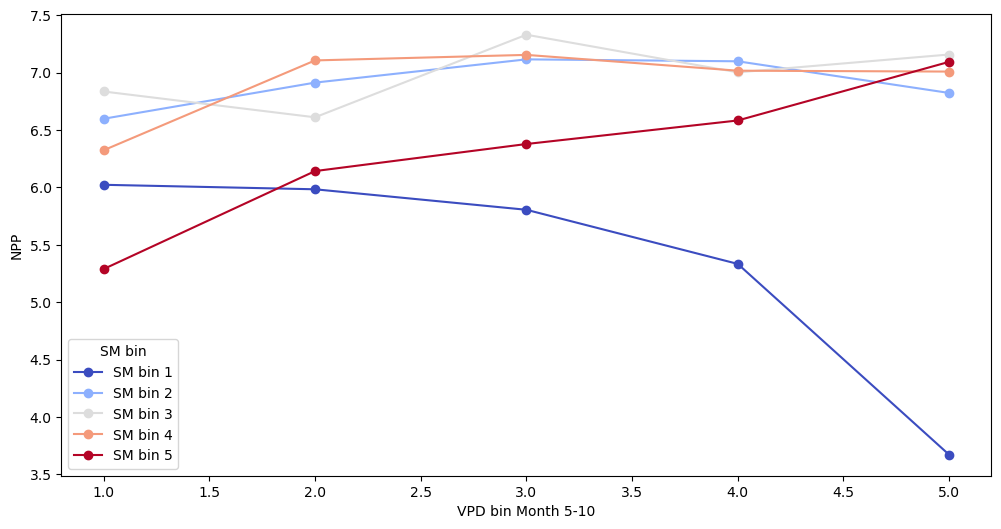

C:\Users\moeag\AppData\Local\Temp\ipykernel_11276\1972120826.py:49: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('coolwarm', 5)


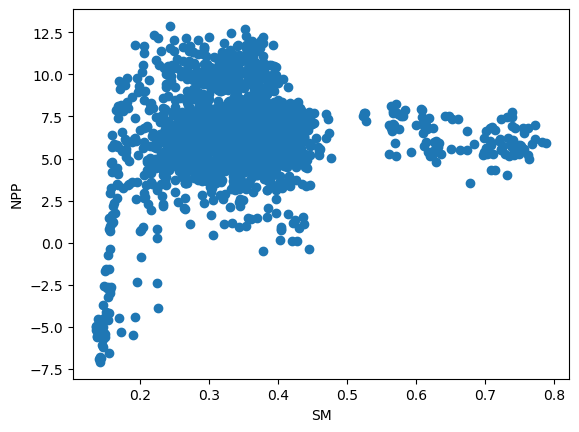

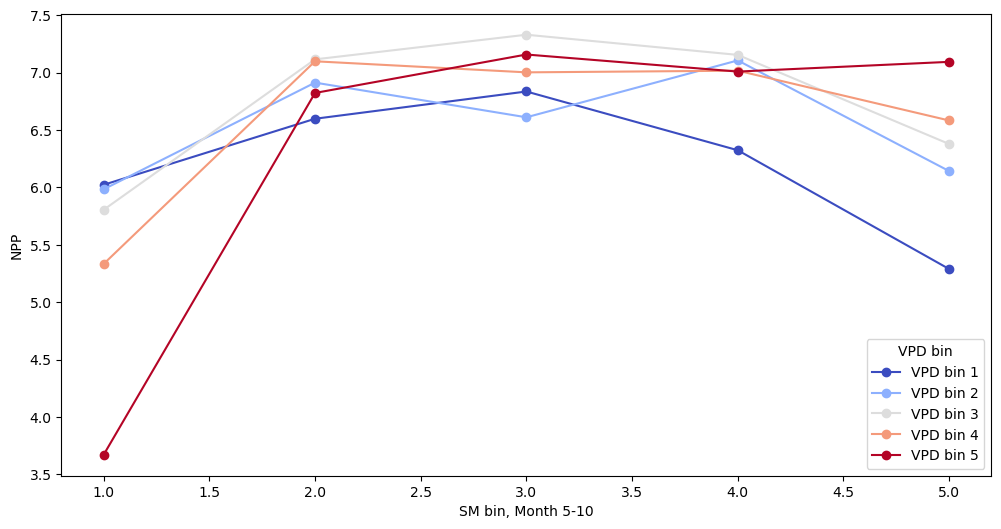

<Axes: xlabel='SM_bin', ylabel='VPD_bin'>

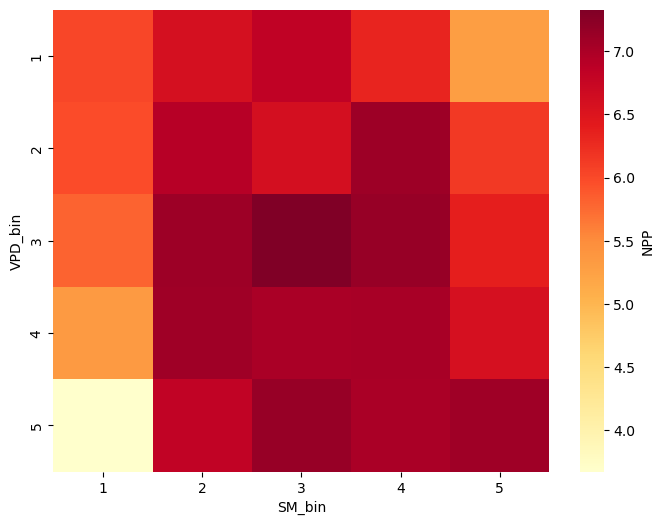

In [51]:
merged = pd.concat([cha_daily,  lae_daily, dav_daily], ignore_index=True) #dav_daily,

#filter
merged_filtered = merged[(merged['VPD'] > 500) & (merged['Ta'] > 15) & (merged['PAR']>100)& (merged['Month'].isin([5, 6, 7, 8,9,10]))] #growing season according to TA

#Divide in bins
merged_filtered = merged_filtered.copy() #to have an explicit copy (if not it raises an error)
merged_filtered['SM_bin'] = pd.qcut(merged_filtered['SM'], q=5, labels=False) + 1  # labels from 1 to 10 # Quantile-based discretization function.
merged_filtered['VPD_bin'] = pd.qcut(merged_filtered['VPD'], q=5, labels=False) + 1
print(merged_filtered)


## Relationships between NPP and VPD
plt.scatter(merged_filtered['VPD'], merged_filtered['SM'], c=merged_filtered['VPD_bin']) #peut etre selectionner un treshold plus élevé pour VPD?
plt.xlabel('VPD')
plt.ylabel('SM')

# for each combination of bins
merged_grouped = merged_filtered.groupby(['SM_bin', 'VPD_bin'])['NPP'].mean().reset_index()

#graphe
plt.figure(figsize=(12, 6))
import matplotlib.cm as cm
cmap = cm.get_cmap('coolwarm', 5)

for i, sm_bin in enumerate(sorted(merged_grouped['SM_bin'].unique())):
    subset = merged_grouped[merged_grouped['SM_bin'] == sm_bin]
    color = cmap(i)
    plt.plot(
        subset['VPD_bin'], 
        subset['NPP'], 
        marker='o', 
        label=f'SM bin {sm_bin}', 
        color=color
    )

plt.legend(title='SM bin')
plt.xlabel('VPD bin Month 5-10')
plt.ylabel('NPP')
plt.show()

## Relationship between NPP and soil moisture
plt.scatter(merged_filtered['SM'], merged_filtered['NPP'])
plt.xlabel('SM')
plt.ylabel('NPP')

plt.figure(figsize=(12, 6))

cmap = cm.get_cmap('coolwarm', 5)

for i, vpd_bin in enumerate(sorted(merged_grouped['VPD_bin'].unique())):
    subset = merged_grouped[merged_grouped['VPD_bin'] == vpd_bin]
    color = cmap(i)
    plt.plot(
        subset['SM_bin'], 
        subset['NPP'], 
        marker='o', 
        label=f'VPD bin {vpd_bin}', 
        color=color
    )
plt.legend(title='VPD bin')
plt.xlabel('SM bin, Month 5-10')
plt.ylabel('NPP')
plt.show() 

## Heatmap
pivot_table = merged_grouped.pivot(index='VPD_bin', columns='SM_bin', values='NPP')

plt.figure(figsize=(8, 6))

sns.heatmap(
    pivot_table,
    cmap='YlOrRd',
    annot=False, #change in true if we want to see the values
    fmt=".2f",
    cbar_kws={'label': 'NPP'}
)


In [52]:

SM_bin_values = merged_filtered.groupby(['SM_bin', 'VPD_bin']).agg(
    mean_NPP=('NPP', 'mean'),
    mean_SM=('SM', 'mean'),
    mean_VPD=('VPD', 'mean'),
    count=('NPP', 'count')  # ou 'size' si tu veux compter même les NaN
).reset_index()

print(SM_bin_values)


# VPD_bin_values = merged_filtered.groupby(['VPD_bin']).agg({
#     'NPP': 'mean',
#     'SM': 'mean',      # Moyenne de SM dans le bin
#     'VPD': 'mean'      # Moyenne de VPD dans le bin
# }).reset_index()
# print(VPD_bin_values)

    SM_bin  VPD_bin  mean_NPP   mean_SM     mean_VPD  count
0        1        1  6.022861  0.240172   583.798891     43
1        1        2  5.983674  0.237408   713.858777     69
2        1        3  5.805172  0.226327   859.616376     72
3        1        4  5.333574  0.223099  1022.071919     88
4        1        5  3.671053  0.218928  1436.370059    143
5        2        1  6.598204  0.307871   577.761564     79
6        2        2  6.913098  0.306495   721.205492     73
7        2        3  7.115631  0.309595   847.629293     79
8        2        4  7.098812  0.305382  1018.381142    102
9        2        5  6.822958  0.309567  1398.790849     81
10       3        1  6.835644  0.349936   571.022852     93
11       3        2  6.610870  0.349053   713.909848     92
12       3        3  7.330317  0.347081   851.042853     89
13       3        4  7.002507  0.347082  1018.329320     76
14       3        5  7.157873  0.347699  1455.998324     65
15       4        1  6.323870  0.379068 

In [53]:
print(merged_filtered)

            Date         Ta          VPD        SM         PAR  Year  Month  \
144   2005-05-25  16.486125   541.790846  0.394809  139.774863  2005      5   
145   2005-05-26  19.077437   654.859749  0.376440  148.673829  2005      5   
146   2005-05-27  21.047333   690.378347  0.364712  143.816213  2005      5   
147   2005-05-28  21.948625   772.772026  0.354944  150.480336  2005      5   
148   2005-05-29  21.980708   723.018001  0.351671  140.704514  2005      5   
...          ...        ...          ...       ...         ...   ...    ...   
17386 2019-08-08  16.909896   876.777412  0.229891  129.284775  2019      8   
17387 2019-08-09  17.443979   966.829936  0.227775  129.262547  2019      8   
17390 2019-08-12  16.475188   675.279901  0.223029  102.083142  2019      8   
17398 2019-08-20  17.616208   825.719576  0.219986  125.254784  2019      8   
17399 2019-08-21  18.700917  1027.483149  0.218397  119.038011  2019      8   

       Day        NPP       SIF  SM_bin  VPD_bin  


# Variation of soil texture
## Load data

C:\Users\moeag\AppData\Local\Temp\ipykernel_11276\4232664146.py:17: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  date_range = pd.date_range(start=start_date, periods=len(cha_s), freq='H')


            Ta        VPD        SM  PARB  PARD  PAR                Date  \
0       2.2570   6.134699  0.000000   0.0   0.0  0.0 2005-01-01 00:00:00   
1       2.2945   6.069162  0.419919   0.0   0.0  0.0 2005-01-01 01:00:00   
2       2.2490  13.289646  0.420260   0.0   0.0  0.0 2005-01-01 02:00:00   
3       2.3290  17.970873  0.422095   0.0   0.0  0.0 2005-01-01 03:00:00   
4       2.7175  15.666741  0.423913   0.0   0.0  0.0 2005-01-01 04:00:00   
...        ...        ...       ...   ...   ...  ...                 ...   
140251  1.1260   0.074910  0.340488   0.0   0.0  0.0 2020-12-31 19:00:00   
140252  0.8890   0.000000  0.336041   0.0   0.0  0.0 2020-12-31 20:00:00   
140253  0.1375   0.000000  0.330633   0.0   0.0  0.0 2020-12-31 21:00:00   
140254 -0.6775   0.000000  0.312110   0.0   0.0  0.0 2020-12-31 22:00:00   
140255  0.0565   0.000000  0.306834   0.0   0.0  0.0 2020-12-31 23:00:00   

          Date_day  Year  Month  Day  Hour  
0       2005-01-01  2005      1    1     0

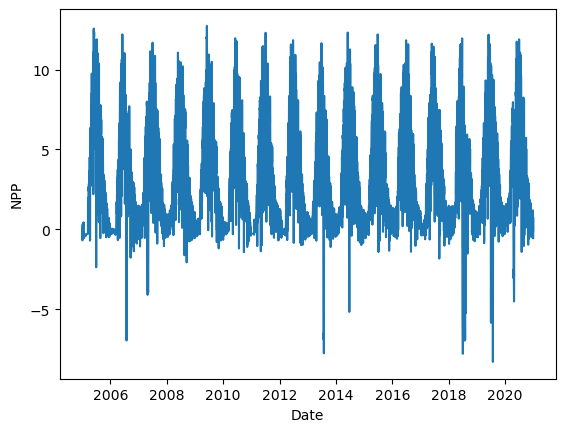

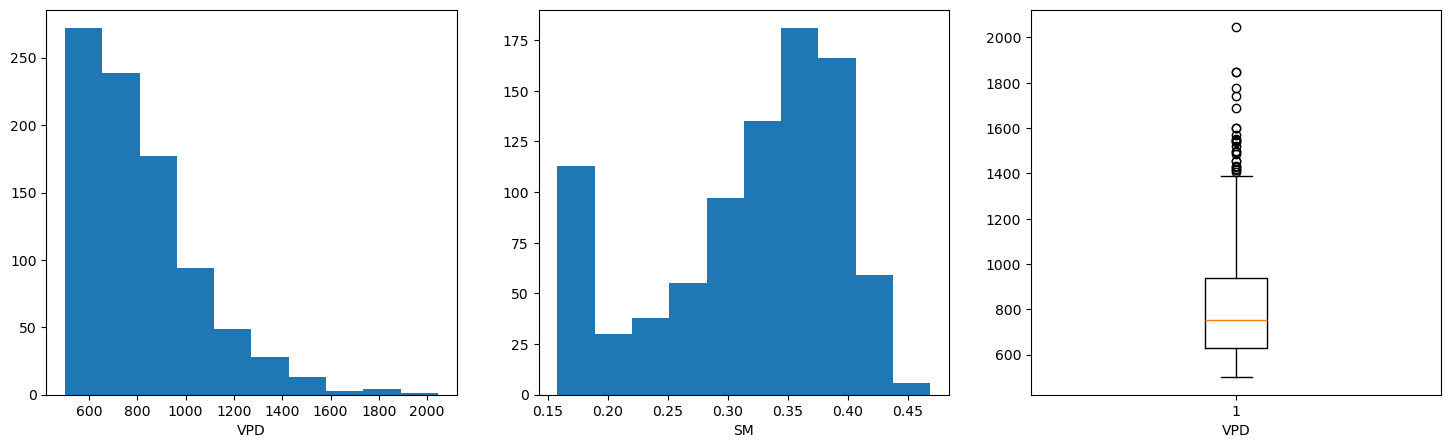

In [56]:
## Load data
cha_s_mat= h5py.File("CHAMAU_Sandy.mat", 'r')
cha_s_mat

cha_s = pd.DataFrame(
    { 
        'Ta': cha_s_mat['Ta'][:].squeeze(),
        'VPD': cha_s_mat['Ds'][:].squeeze(), #in Pa
        'SM': cha_s_mat['OH'][0][:].squeeze(), # first soil layer (surface) #high veget #OL=low veget
         'PARB': cha_s_mat['PARB'][:].squeeze(), #direct radiation
        'PARD': cha_s_mat['PARD'][:].squeeze(), #diffuse radiation
    }
)
cha_s['PAR']= cha_s['PARB'] + cha_s['PARD']

start_date = '2005-01-01 00:00:00' # de 2004 à 2023
date_range = pd.date_range(start=start_date, periods=len(cha_s), freq='H')
cha_s['Date'] = date_range
cha_s['Date_day'] = cha_s['Date'].dt.date
cha_s['Year'] = cha_s['Date'].dt.year
cha_s['Month'] = cha_s['Date'].dt.month
cha_s['Day'] = cha_s['Date'].dt.day
cha_s['Hour'] = cha_s['Date'].dt.hour

#les data ne vont que jusqu'à 2020 dans cha_s alors qu'elles vont jusqu'à 2023 dans les données de base
print(cha_s)


## Daily mean
# Groupby day to have daily mean
cha_s_daily = cha_s.groupby('Date_day')[['Ta','VPD','SM', 'PAR']].mean().reset_index()

#rearrange
cha_s_daily.rename(columns={'Date_day': 'Date'}, inplace=True)
cha_s_daily['Date'] = pd.to_datetime(cha_s_daily['Date'])
cha_s_daily['Year'] = cha_s_daily['Date'].dt.year
cha_s_daily['Month'] = cha_s_daily['Date'].dt.month
cha_s_daily['Day'] = cha_s_daily['Date'].dt.day

cha_s_daily['NPP'] = cha_s_mat['NPP_L'][0][1:] #high because mixed deciduous mountain forest #there were 2 columns, I took the one with positive values

plt.plot(cha_s_daily['Date'], cha_s_daily['NPP'])
plt.xlabel('Date')
plt.ylabel('NPP')

## Filter data
cha_s_filtered=cha_s_daily[(cha_s_daily['VPD']>500) & (cha_s_daily['Ta']>15) & (cha_s_daily['PAR']>100) & (cha_s_daily['Month'].isin([5,6,7,8, 9, 10]))]
#& (cha_daily['PAR']>75)
#if months are 4-7: more linear relationship
print(cha_s_filtered)


## Divide in bins
# Histogrammes
plt.figure(figsize=(18, 5))
plt.subplot(1, 3, 1)
plt.hist(cha_s_filtered['VPD'])
plt.xlabel('VPD')
plt.subplot(1, 3, 2)
plt.hist(cha_s_filtered['SM'])
plt.xlabel('SM')
plt.subplot(1, 3, 3)
plt.boxplot(cha_s_filtered['VPD'])
plt.xlabel('VPD')

#Divide in bins
cha_s_filtered = cha_s_filtered.copy() #to have an explicit copy (if not it raises an error)
cha_s_filtered['SM_bin'] = pd.qcut(cha_s_filtered['SM'], q=5, labels=False) + 1  # labels from 1 to 10 # Quantile-based discretization function.
cha_s_filtered['VPD_bin'] = pd.qcut(cha_s_filtered['VPD'], q=5, labels=False) + 1
print(cha_s_filtered)


## Graph for sandy soil

C:\Users\moeag\AppData\Local\Temp\ipykernel_11276\3141387716.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('coolwarm', 5)


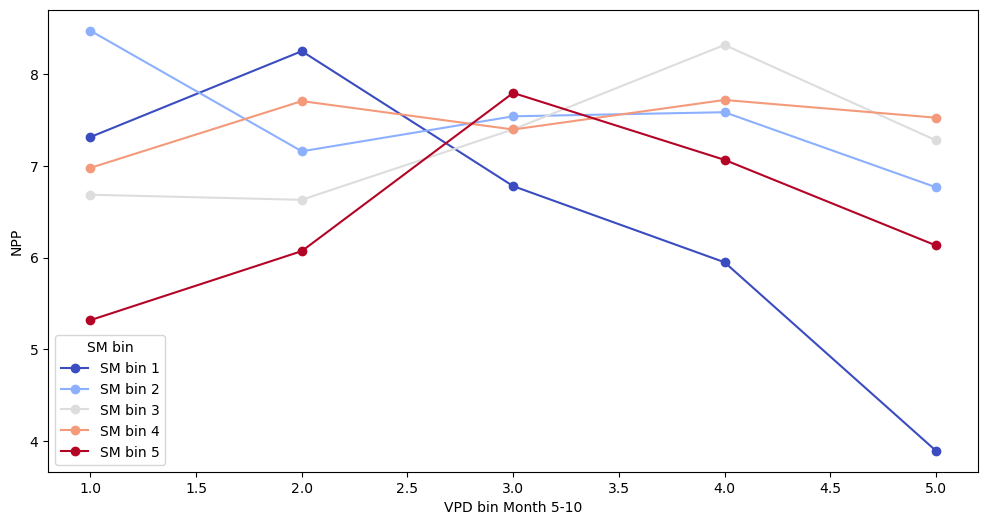

C:\Users\moeag\AppData\Local\Temp\ipykernel_11276\3141387716.py:32: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('coolwarm', 5)


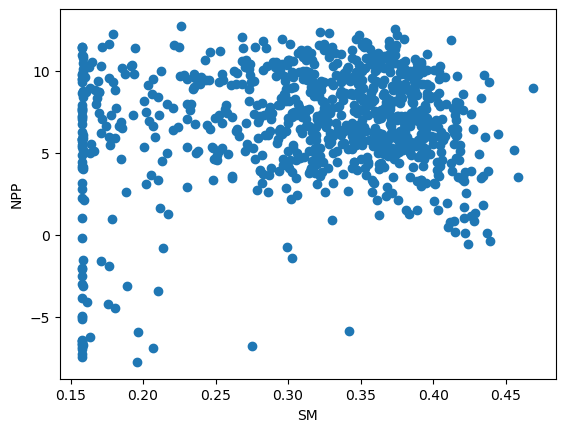

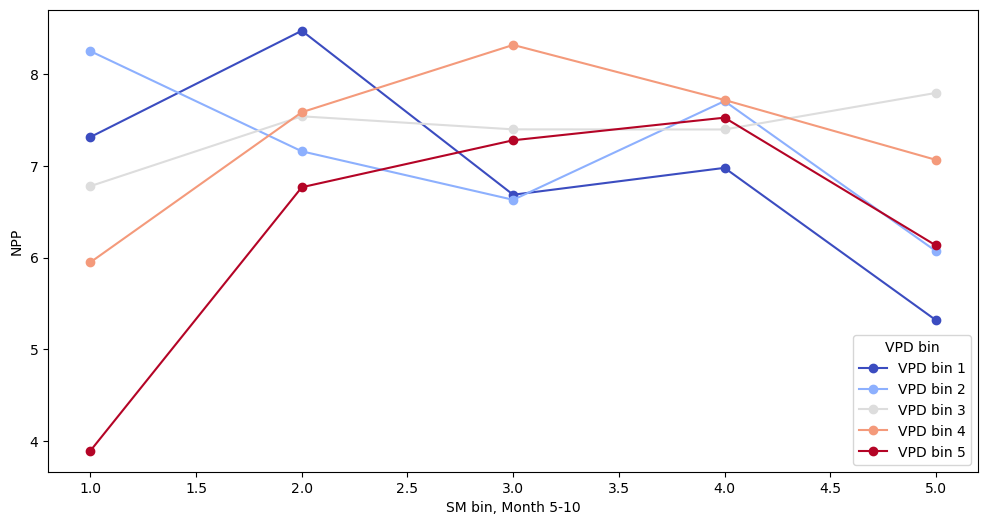

<Axes: xlabel='SM_bin', ylabel='VPD_bin'>

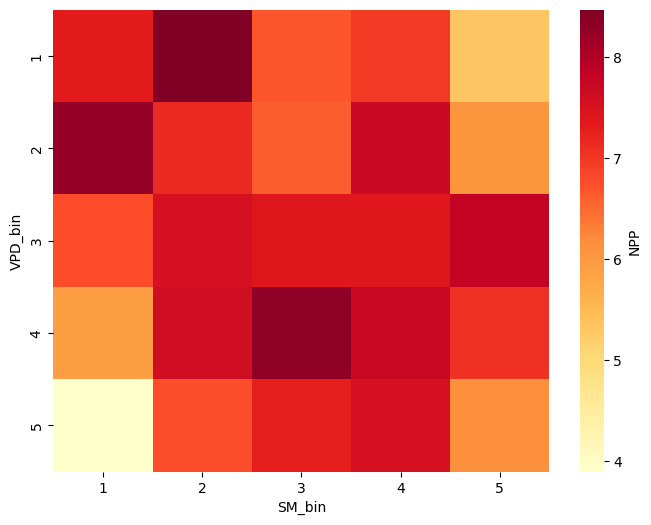

In [57]:

# for each combination of bins
grouped_cha_s = cha_s_filtered.groupby(['SM_bin', 'VPD_bin'])['NPP'].mean().reset_index()

#graphe
plt.figure(figsize=(12, 6))
import matplotlib.cm as cm
cmap = cm.get_cmap('coolwarm', 5)

for i, sm_bin in enumerate(sorted(grouped_cha_s['SM_bin'].unique())):
    subset = grouped_cha_s[grouped_cha_s['SM_bin'] == sm_bin]
    color = cmap(i)
    plt.plot(
        subset['VPD_bin'], 
        subset['NPP'], 
        marker='o', 
        label=f'SM bin {sm_bin}', 
        color=color
    )

plt.legend(title='SM bin')
plt.xlabel('VPD bin Month 5-10')
plt.ylabel('NPP')
plt.show()

## Relationship between NPP and soil moisture
plt.scatter(cha_s_filtered['SM'], cha_s_filtered['NPP'])
plt.xlabel('SM')
plt.ylabel('NPP')

plt.figure(figsize=(12, 6))

cmap = cm.get_cmap('coolwarm', 5)

for i, vpd_bin in enumerate(sorted(grouped_cha_s['VPD_bin'].unique())):
    subset = grouped_cha_s[grouped_cha_s['VPD_bin'] == vpd_bin]
    color = cmap(i)
    plt.plot(
        subset['SM_bin'], 
        subset['NPP'], 
        marker='o', 
        label=f'VPD bin {vpd_bin}', 
        color=color
    )
plt.legend(title='VPD bin')
plt.xlabel('SM bin, Month 5-10')
plt.ylabel('NPP')
plt.show() 

## Heatmap
pivot_table = grouped_cha_s.pivot(index='VPD_bin', columns='SM_bin', values='NPP')

plt.figure(figsize=(8, 6))

sns.heatmap(
    pivot_table,
    cmap='YlOrRd',
    annot=False, #change in true if we want to see the values
    fmt=".2f",
    cbar_kws={'label': 'NPP'}
)

## Graph for origin soil

    SM_bin  VPD_bin       NPP       SIF
0        1        1  4.697607  0.079110
1        1        2  6.235506  0.158115
2        1        3  4.451588  0.164057
3        1        4  5.270620  0.262662
4        1        5  1.121560  0.123124
5        2        1  8.002719  0.212306
6        2        2  7.062946  0.094660
7        2        3  8.159838  0.240770
8        2        4  7.966947  0.144851
9        2        5  7.864084  0.169325
10       3        1  7.343244  0.235536
11       3        2  7.436075  0.096609
12       3        3  7.215436  0.322036
13       3        4  8.104728  0.428035
14       3        5  8.017600  0.498710
15       4        1  6.842356  0.247709
16       4        2  7.236322  0.438987
17       4        3  7.713759  0.421999
18       4        4  8.755074  0.564799
19       4        5  8.176447  0.481769
20       5        1  5.170708  0.156989
21       5        2  6.683388  0.207437
22       5        3  8.027362  0.365996
23       5        4  8.641652  0.410230


C:\Users\moeag\AppData\Local\Temp\ipykernel_11276\2093713847.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('coolwarm', 5)


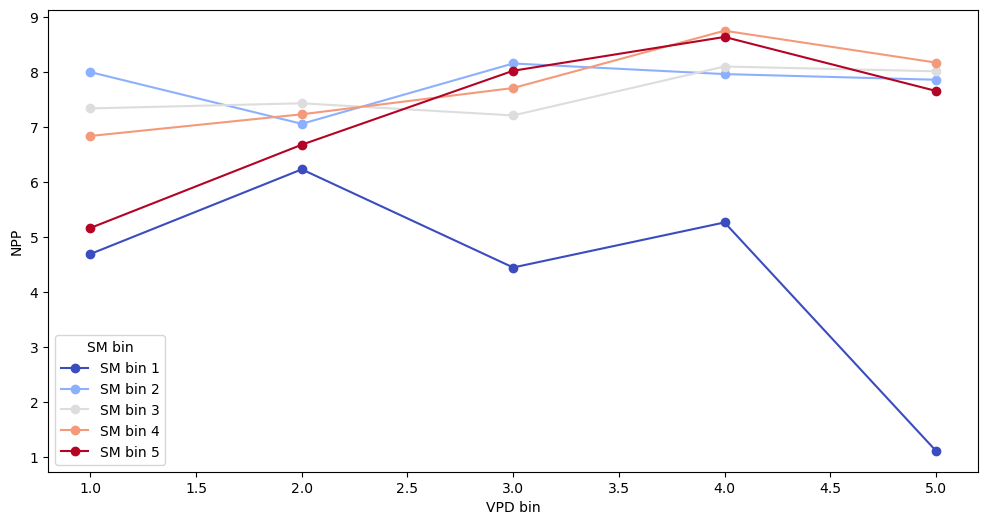

C:\Users\moeag\AppData\Local\Temp\ipykernel_11276\2093713847.py:27: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('coolwarm', 5)


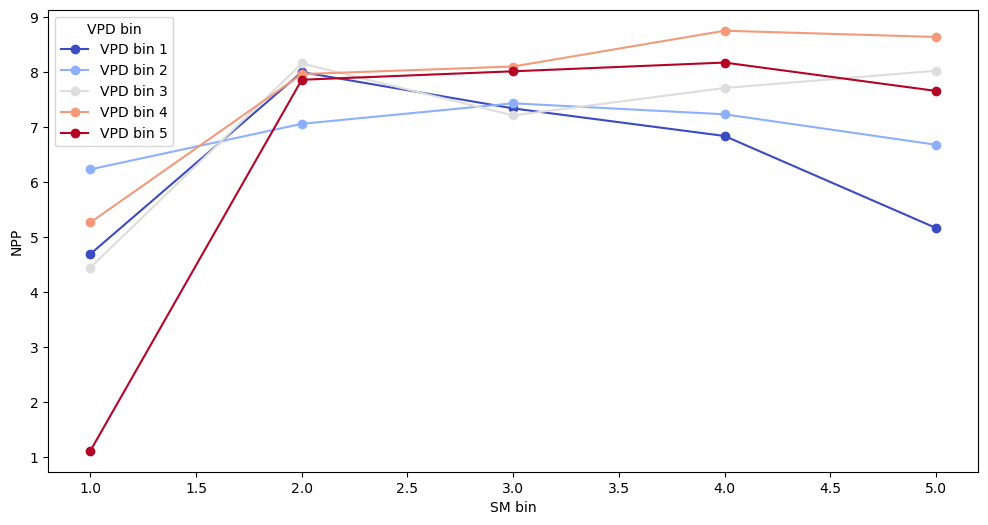

In [58]:
grouped_cha = cha_filtered.groupby(['SM_bin', 'VPD_bin'])[['NPP', 'SIF']].mean().reset_index()
print(grouped_cha)

#graphe
plt.figure(figsize=(12, 6))
import matplotlib.cm as cm
cmap = cm.get_cmap('coolwarm', 5)

for i, sm_bin in enumerate(sorted(grouped_cha['SM_bin'].unique())):
    subset = grouped_cha[grouped_cha['SM_bin'] == sm_bin]
    color = cmap(i)
    plt.plot(
        subset['VPD_bin'], 
        subset['NPP'], 
        marker='o', 
        label=f'SM bin {sm_bin}', 
        color=color
    )

plt.legend(title='SM bin')
plt.xlabel('VPD bin')
plt.ylabel('NPP')
plt.show() 

plt.figure(figsize=(12, 6))

cmap = cm.get_cmap('coolwarm', 5)

for i, vpd_bin in enumerate(sorted(grouped_cha['VPD_bin'].unique())):
    subset = grouped_cha[grouped_cha['VPD_bin'] == vpd_bin]
    color = cmap(i)
    plt.plot(
        subset['SM_bin'], 
        subset['NPP'], 
        marker='o', 
        label=f'VPD bin {vpd_bin}', 
        color=color
    )
plt.legend(title='VPD bin')
plt.xlabel('SM bin')
plt.ylabel('NPP')
plt.show() 

## both graphs

C:\Users\moeag\AppData\Local\Temp\ipykernel_11276\1101508135.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('coolwarm', 5)


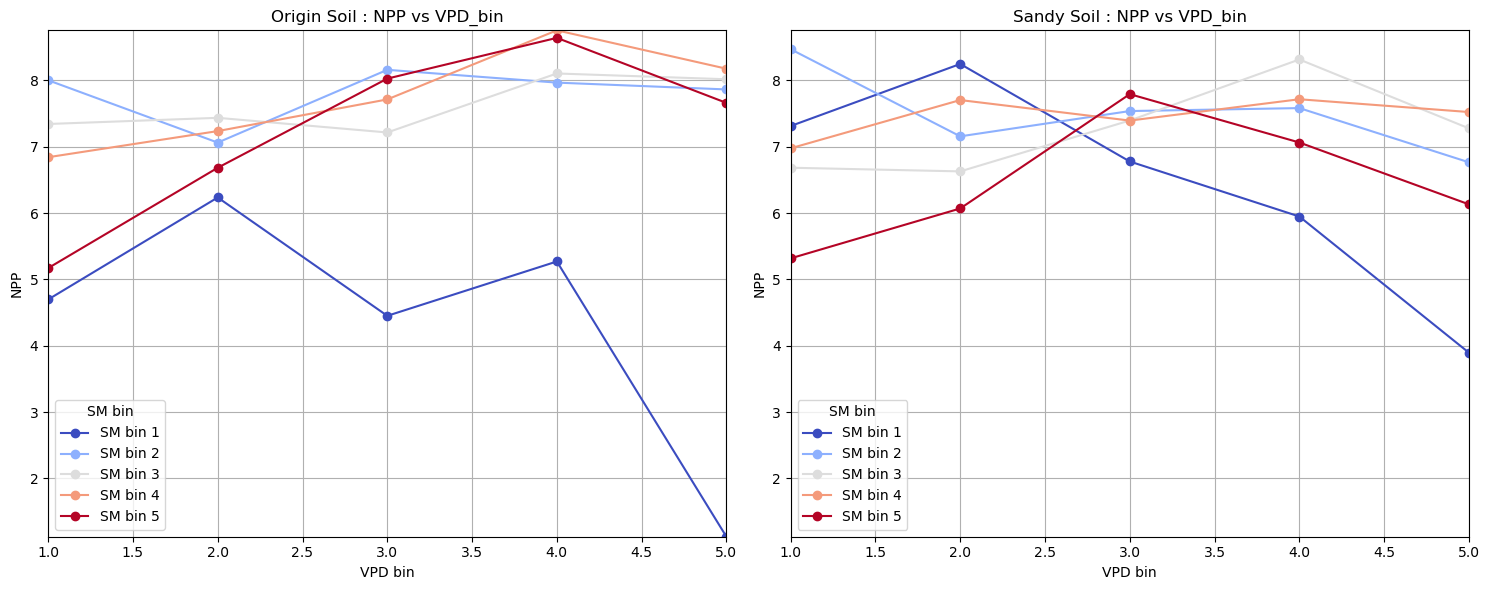

In [60]:
#VPD

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

cmap = cm.get_cmap('coolwarm', 5)

x_limits = None
y_limits = None

for i, sm_bin in enumerate(sorted(grouped_cha['SM_bin'].unique())):
    subset = grouped_cha[grouped_cha['SM_bin'] == sm_bin]
    color = cmap(i)
    ax1.plot(
        subset['VPD_bin'], 
        subset['NPP'], 
        marker='o', 
        label=f'SM bin {sm_bin}', 
        color=color
    )
    if x_limits is None:
        x_limits = [min(subset['VPD_bin']), max(subset['VPD_bin'])]
    else:
        x_limits[0] = min(x_limits[0], min(subset['VPD_bin']))
        x_limits[1] = max(x_limits[1], max(subset['VPD_bin']))
        
    if y_limits is None:
        y_limits = [min(subset['NPP']), max(subset['NPP'])]
    else:
        y_limits[0] = min(y_limits[0], min(subset['NPP']))
        y_limits[1] = max(y_limits[1], max(subset['NPP']))


ax1.legend(title='SM bin')
ax1.set_xlabel('VPD bin')
ax1.set_ylabel('NPP')
ax1.set_title('Origin Soil : NPP vs VPD_bin')
ax1.grid(True)

for i, sm_bin in enumerate(sorted(grouped_cha_s['SM_bin'].unique())):
    subset = grouped_cha_s[grouped_cha_s['SM_bin'] == sm_bin]
    color = cmap(i)
    ax2.plot(
        subset['VPD_bin'], 
        subset['NPP'], 
        marker='o', 
        label=f'SM bin {sm_bin}', 
        color=color
    )
    x_limits[0] = min(x_limits[0], min(subset['VPD_bin']))
    x_limits[1] = max(x_limits[1], max(subset['VPD_bin']))
    
    y_limits[0] = min(y_limits[0], min(subset['NPP']))
    y_limits[1] = max(y_limits[1], max(subset['NPP']))

ax2.legend(title='SM bin')
ax2.set_xlabel('VPD bin')
ax2.set_ylabel('NPP')
ax2.set_title('Sandy Soil : NPP vs VPD_bin')
ax2.grid(True)

ax1.set_xlim(x_limits)
ax1.set_ylim(y_limits)
ax2.set_xlim(x_limits)
ax2.set_ylim(y_limits)

plt.tight_layout()
plt.show()



C:\Users\moeag\AppData\Local\Temp\ipykernel_11276\1622950904.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('coolwarm', 5)


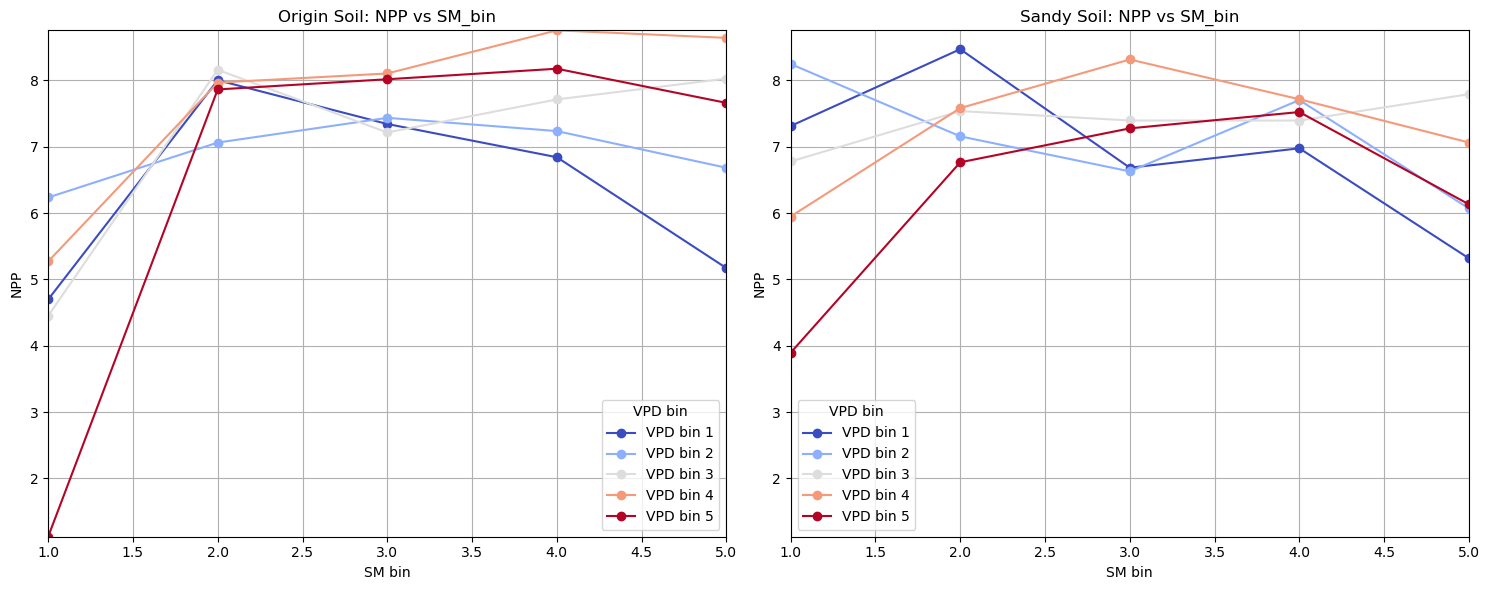

In [61]:
#SM

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

cmap = cm.get_cmap('coolwarm', 5)

x_limits = None
y_limits = None

for i, vpd_bin in enumerate(sorted(grouped_cha['VPD_bin'].unique())):
    subset = grouped_cha[grouped_cha['VPD_bin'] == vpd_bin]
    color = cmap(i)
    ax1.plot(
        subset['SM_bin'], 
        subset['NPP'], 
        marker='o', 
        label=f'VPD bin {vpd_bin}', 
        color=color
    )
    if x_limits is None:
        x_limits = [min(subset['SM_bin']), max(subset['SM_bin'])]
    else:
        x_limits[0] = min(x_limits[0], min(subset['SM_bin']))
        x_limits[1] = max(x_limits[1], max(subset['SM_bin']))
        
    if y_limits is None:
        y_limits = [min(subset['NPP']), max(subset['NPP'])]
    else:
        y_limits[0] = min(y_limits[0], min(subset['NPP']))
        y_limits[1] = max(y_limits[1], max(subset['NPP']))


ax1.legend(title='VPD bin')
ax1.set_xlabel('SM bin')
ax1.set_ylabel('NPP')
ax1.set_title('Origin Soil: NPP vs SM_bin')
ax1.grid(True)

for i, vpd_bin in enumerate(sorted(grouped_cha_s['VPD_bin'].unique())):
    subset = grouped_cha_s[grouped_cha_s['VPD_bin'] == vpd_bin]
    color = cmap(i)
    ax2.plot(
        subset['SM_bin'], 
        subset['NPP'], 
        marker='o', 
        label=f'VPD bin {vpd_bin}', 
        color=color
    )
    x_limits[0] = min(x_limits[0], min(subset['SM_bin']))
    x_limits[1] = max(x_limits[1], max(subset['SM_bin']))
    
    y_limits[0] = min(y_limits[0], min(subset['NPP']))
    y_limits[1] = max(y_limits[1], max(subset['NPP']))

ax2.legend(title='VPD bin')
ax2.set_xlabel('SM bin')
ax2.set_ylabel('NPP')
ax2.set_title('Sandy Soil: NPP vs SM_bin')
ax2.grid(True)

ax1.set_xlim(x_limits)
ax1.set_ylim(y_limits)
ax2.set_xlim(x_limits)
ax2.set_ylim(y_limits)

plt.tight_layout()
plt.show()



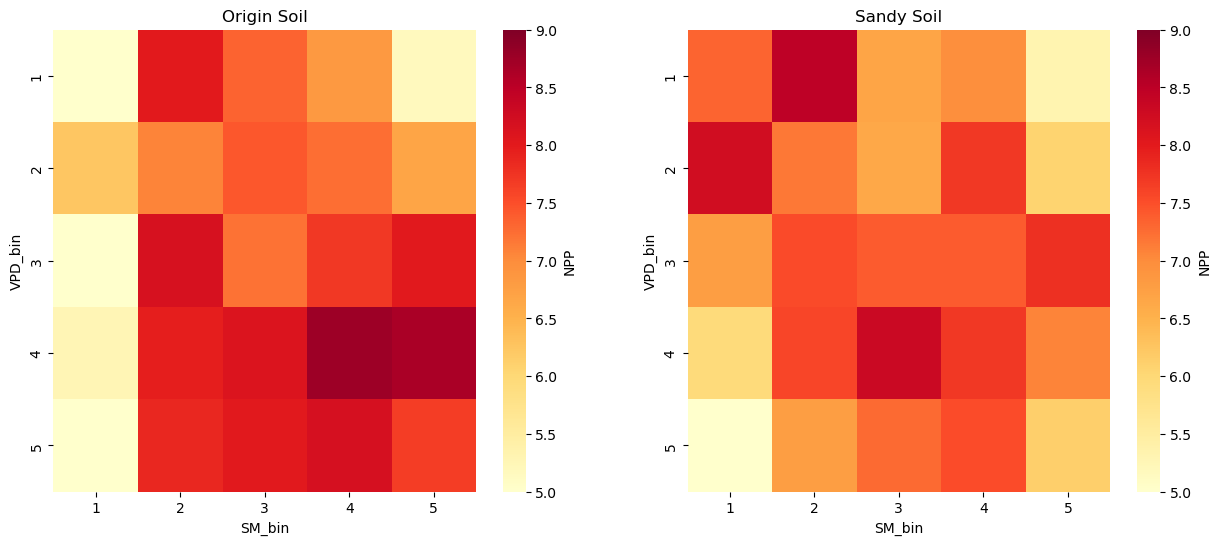

In [71]:
#heatmaps
# Créer les tableaux croisés
pivot_table_origin = grouped_cha.pivot(index='VPD_bin', columns='SM_bin', values='NPP')
pivot_table_sandy = grouped_cha_s.pivot(index='VPD_bin', columns='SM_bin', values='NPP')

# Trouver les bornes min et max communes
# vmin = min(pivot_table_origin.min().min(), pivot_table_sandy.min().min())
# vmax = max(pivot_table_origin.max().max(), pivot_table_sandy.max().max())
vmin=5
vmax=9

# Créer les sous-graphes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Heatmap pour Origin Soil
sns.heatmap(
    pivot_table_origin,
    cmap='YlOrRd',
    annot=False,
    fmt=".2f",
    cbar_kws={'label': 'NPP'},
    ax=ax1,
    vmin=vmin,
    vmax=vmax
)
ax1.set_title('Origin Soil')

# Heatmap pour Sandy Soil
sns.heatmap(
    pivot_table_sandy,
    cmap='YlOrRd',
    annot=False,
    fmt=".2f",
    cbar_kws={'label': 'NPP'},
    ax=ax2,
    vmin=vmin,
    vmax=vmax
)
ax2.set_title('Sandy Soil')

plt.show()